# Bike Sharing: Multiple Linear Regression

## <a id='top'>Outline:<a />

1. [Introduction](#introduction)
2. [Data Preprocessing](#data-preprocessing)
    1. [Data Cleaning](#data-cleaning)
    2. [Data Transformation](#data-transformation)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
    1. [Univariate Analysis](#univariate-analysis)
    2. [Bivariate Analysis](#bivariate-analysis)
4. [Feature Engineering](#feature-engineering)
    1. [Feature Scaling](#feature-scaling)
    2. [Feature Encoding](#feature-encoding)
    3. [Feature Selection](#feature-selection)
4. [Model Building](#model-building)
5. [Model Evaluation](#model-evaluation)
6. [Conclusion](#conclusion)

# **<a id='introduction'>1. INTRODUCTION<a/>**  [▲](#top)

### PROBLEM STATEMENT

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### BUSINESS GOAL

> To Model the demand for shared bikes with the available independent variables, which would be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model would be a good way for management to understand the demand dynamics of a new market. 

### IMPORTING REQUIRED LIBRARIES

In [1]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [3]:
# Set Visualization theme
sns.set_theme()
sns.set_context("talk")

### LOADING THE DATASET

In [4]:
#Read the csv file using pandas
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.shape

(730, 16)

#### OBSERVATIONS

- There are 730 rows and 16 columns in the dataset. There are no non-null columns in the entire dataset.
- `dteday` should be in datetime format but it is in object datatype.
- All the other columns are either float or int.
- Some columns logically make sense to be treated as categorical variables but are in int/float datatype, e.g. `season`, `yr`, `mnth`, etc.

### IDENTIFY THE TYPE OF THE COLUMNS

In [7]:
bike_sharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### OBSERVATIONS

The **Categorical Columns** are:

> `season`, `year`, `month`, `holiday`, `weekday`, `working_day`, and `weather_situations`.

However, the **Numerical Columns** are:

> `temperature`, `apparent_temperature`, `humidity`, `wind_speed`, and `count`.

# **<a id='data-preprocessing'>2. DATA PREPROCESSING<a/>**  [▲](#top)

## **<a id='data-cleaning'>A. DATA CLEANING<a/>**  [▲](#top)

### CHECK FOR MISSING VALUES

In [8]:
# Column-wise
bike_sharing.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

> There are **NO Null Values** in columns.

In [9]:
# Row-wise
bike_sharing[bike_sharing.isnull().any(axis=1)]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

> There are **NO Null Values** in rows.

### CHECK FOR DATA DUPLICACY

In [10]:
bike_sharing[bike_sharing.duplicated()]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

> There are **NO Duplicate Rows** in the dataset.

## **<a id='data-transformation'>B. DATA TRANSFORMATION<a/>**  [▲](#top)

### DROP RENDUNDANT COLUMNS

In [11]:
bike_sharing.head(2)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   

   cnt  
0  985  
1  801

In [12]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Based on the Data Definitions and observations on the columns of the dataset, some columns appear to be redundant:

1. `instant`: Instant is merely an index for the dataset.
<br>

2. `dteday`: Since we already have the columns `yr`, `mnth` and `weekday` we no longer need this column.
<br>

3. `casual` and `registered`: The variables casual and registered represent different user types in the bike rental data. Specifically:
    - `casual`: Indicates the number of casual users who have made a rental.
    - `registered`: Shows the total number of registered users who have made a booking on a given day.
    - `cnt`: Represents the total number of bike rentals, including both casual and registered users.
    - Both `casual` and `registered` are directly additive to `cnt`. Including them in the model would add redundant information and could lead to **multicollinearity**, where independent variables are highly correlated with each other, making it harder to assess the effect of each variable. 
    - When building a predictive model for bike rentals, the `cnt` variable provides the comprehensive target we aim to predict.

In [13]:
bike_sharing.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

In [14]:
bike_sharing.head(2)

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   

      atemp      hum  windspeed  cnt  
0  18.18125  80.5833  10.749882  985  
1  17.68695  69.6087  16.652113  801

In [15]:
# Renaming some ambiguous columns
bike_sharing = bike_sharing.rename(columns = {
    'yr': 'year',
    'mnth': 'month',
    'workingday': 'working_day',
    'weathersit': 'weather_situations',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'cnt': 'count'
})

In [16]:
bike_sharing.head(2)

season  year  month  holiday  weekday  working_day  weather_situations  \
0       1     0      1        0        6            0                   2   
1       1     0      1        0        0            0                   2   

   temperature  apparent_temperature  humidity  wind_speed  count  
0    14.110847              18.18125   80.5833   10.749882    985  
1    14.902598              17.68695   69.6087   16.652113    801

In [17]:
bike_sharing.shape

(730, 12)

### HANDLING OUTLIERS FOR NUMERICAL COLUMNS (IQR METHOD)

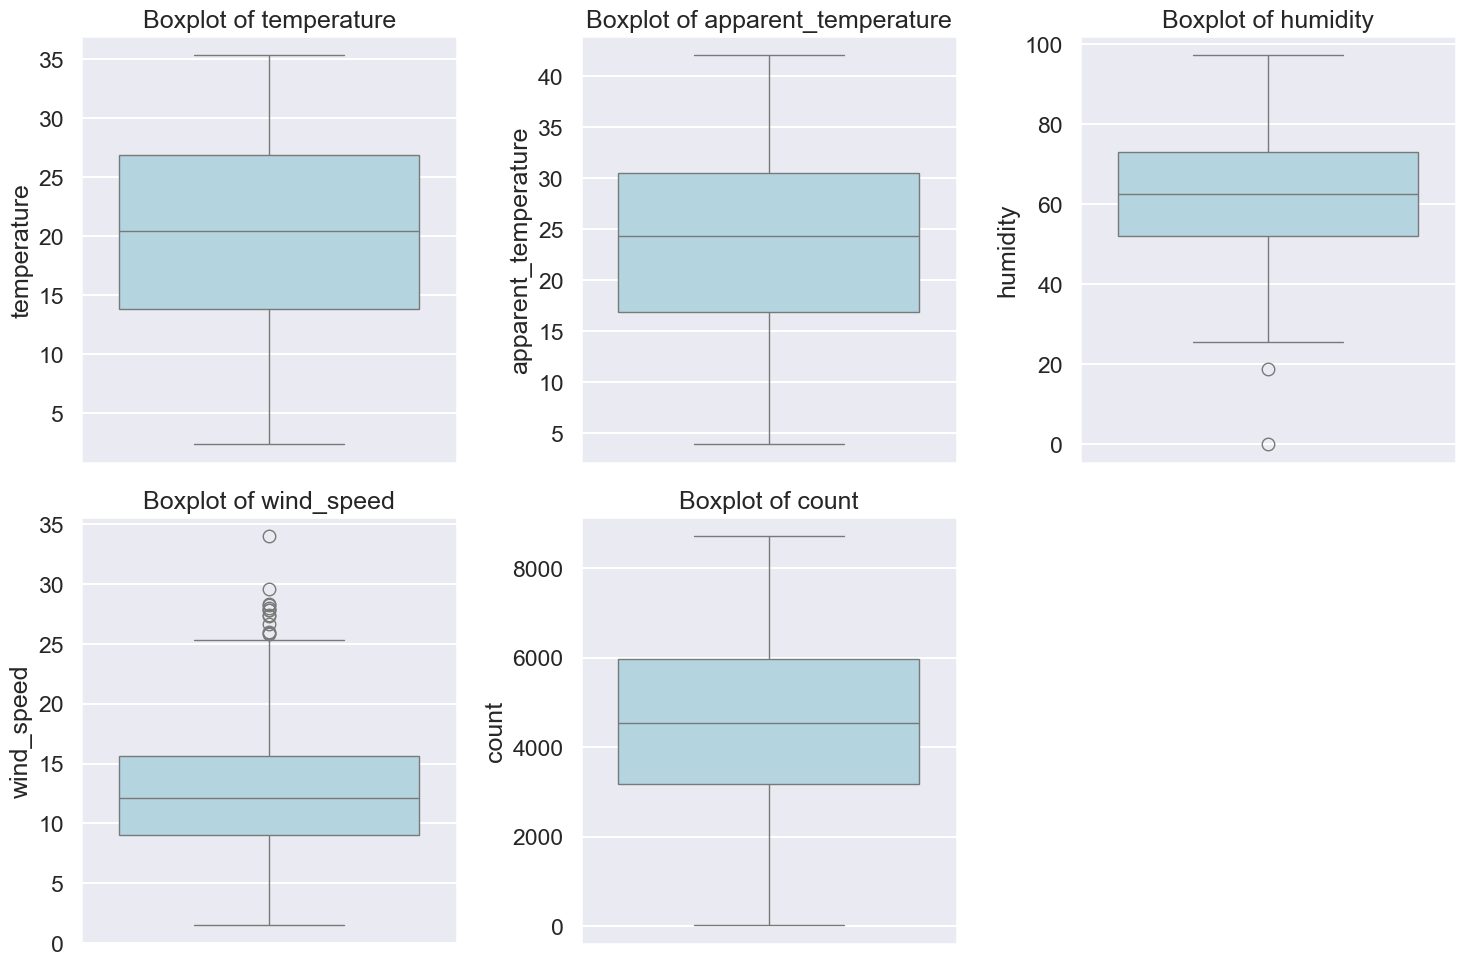

In [18]:
# List of columns to plot
columns_to_plot = ['temperature', 'apparent_temperature', 'humidity', 'wind_speed', 'count']

# Create a figure and axes
plt.figure(figsize=(15, 10))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(y=bike_sharing[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

In [19]:
# Iterate over each column to handle outliers
for column in columns_to_plot:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = bike_sharing[column].quantile(0.25)
    Q3 = bike_sharing[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    bike_sharing = bike_sharing[(bike_sharing[column] >= lower_bound) & (bike_sharing[column] <= upper_bound)]
    
bike_sharing.head()

season  year  month  holiday  weekday  working_day  weather_situations  \
0       1     0      1        0        6            0                   2   
1       1     0      1        0        0            0                   2   
2       1     0      1        0        1            1                   1   
3       1     0      1        0        2            1                   1   
4       1     0      1        0        3            1                   1   

   temperature  apparent_temperature  humidity  wind_speed  count  
0    14.110847              18.18125   80.5833   10.749882    985  
1    14.902598              17.68695   69.6087   16.652113    801  
2     8.050924               9.47025   43.7273   16.636703   1349  
3     8.200000              10.60610   59.0435   10.739832   1562  
4     9.305237              11.46350   43.6957   12.522300   1600

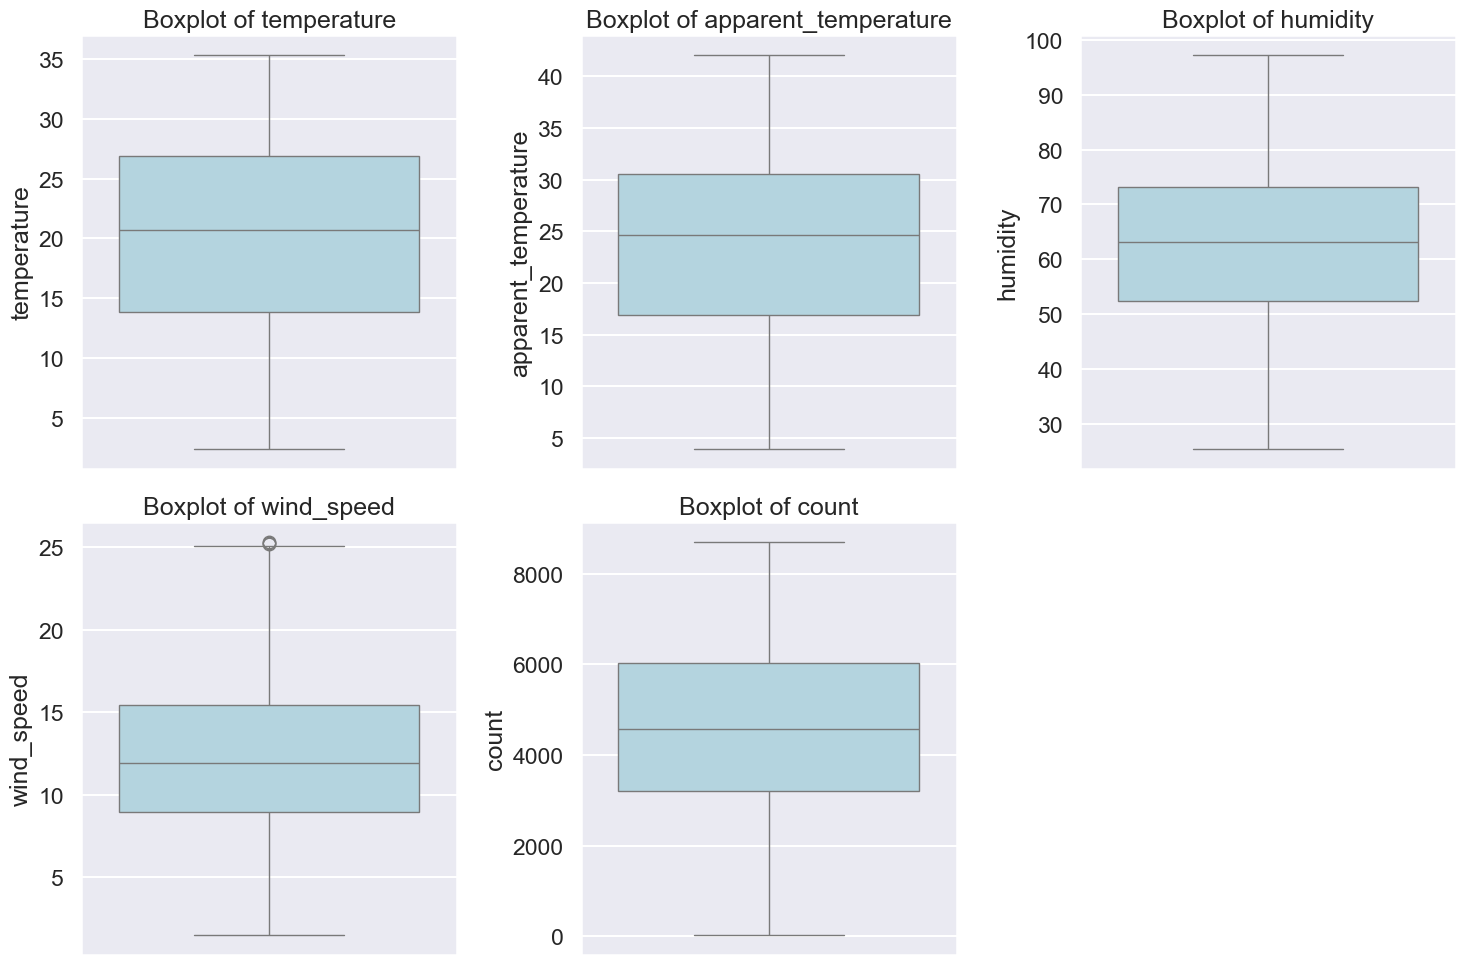

In [20]:
# Create a figure and axes
plt.figure(figsize=(15, 10))

# Plot boxplots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(y=bike_sharing[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

#### OBSERVATIONS

- `temperature`, `apparent_temperature`, and `count` had no outliers.
- `humidity` and `wind_speed` had some outliers and we handled them using the IQR method.
- And now, we can see that we have handled the outliers for all the Numerical Columns.

### HANDLING THE VALUES OF CATEGORICAL COLUMNS

In [21]:
bike_sharing.season.value_counts().sort_index()

season
1    171
2    181
3    188
4    176
Name: count, dtype: int64

In [22]:
bike_sharing.year.value_counts().sort_index()

year
0    359
1    357
Name: count, dtype: int64

In [23]:
bike_sharing.month.value_counts().sort_index()

month
1     61
2     52
3     58
4     58
5     62
6     60
7     62
8     62
9     60
10    60
11    60
12    61
Name: count, dtype: int64

In [24]:
bike_sharing.holiday.value_counts().sort_index()

holiday
0    695
1     21
Name: count, dtype: int64

In [25]:
bike_sharing.weekday.value_counts().sort_index()

weekday
0    103
1    102
2    103
3    102
4    101
5    103
6    102
Name: count, dtype: int64

In [26]:
bike_sharing.working_day.value_counts().sort_index()

working_day
0    226
1    490
Name: count, dtype: int64

In [27]:
bike_sharing.weather_situations.value_counts().sort_index()

weather_situations
1    453
2    243
3     20
Name: count, dtype: int64

> Using the **Data Dictionary** we can replace the values of the columns as:

In [28]:
bike_sharing.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace=True)

bike_sharing.year.replace({0: 2018, 1: 2019}, inplace=True)

bike_sharing.month.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 
                            7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'}, inplace=True)

bike_sharing.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}, inplace=True)

bike_sharing.weather_situations.replace({1:'good',2:'moderate',3:'bad',4:'severe'}, inplace=True)

bike_sharing.head()

season  year month  holiday weekday  working_day weather_situations  \
0  spring  2018   jan        0     sat            0           moderate   
1  spring  2018   jan        0     sun            0           moderate   
2  spring  2018   jan        0     mon            1               good   
3  spring  2018   jan        0     tue            1               good   
4  spring  2018   jan        0     wed            1               good   

   temperature  apparent_temperature  humidity  wind_speed  count  
0    14.110847              18.18125   80.5833   10.749882    985  
1    14.902598              17.68695   69.6087   16.652113    801  
2     8.050924               9.47025   43.7273   16.636703   1349  
3     8.200000              10.60610   59.0435   10.739832   1562  
4     9.305237              11.46350   43.6957   12.522300   1600

# **<a id='exploratory-data-analysis'>3. EXPLORATORY DATA ANALYSIS (EDA)<a/>**  [▲](#top)

In [29]:
bike_sharing.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'working_day',
       'weather_situations', 'temperature', 'apparent_temperature', 'humidity',
       'wind_speed', 'count'],
      dtype='object')

In [30]:
# Categorizing all the columns
num_cols = ['temperature', 'apparent_temperature', 'humidity', 'wind_speed', 'count']
cat_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'working_day', 'weather_situations']

## **<a id='univariate-analysis'>A. UNIVARIATE ANALYSIS<a/>**  [▲](#top)

### NUMERICAL FEATURES

In [31]:
round(bike_sharing[num_cols].describe(), 2)

temperature  apparent_temperature  humidity  wind_speed    count
count       716.00                716.00    716.00      716.00   716.00
mean         20.40                 23.82     63.13       12.48  4536.61
std           7.53                  8.16     13.92        4.81  1932.26
min           2.42                  3.95     25.42        1.50    22.00
25%          13.83                 16.89     52.46        8.99  3214.00
50%          20.74                 24.61     63.08       11.96  4572.50
75%          26.93                 30.56     73.26       15.46  6031.75
max          35.33                 42.04     97.25       25.33  8714.00

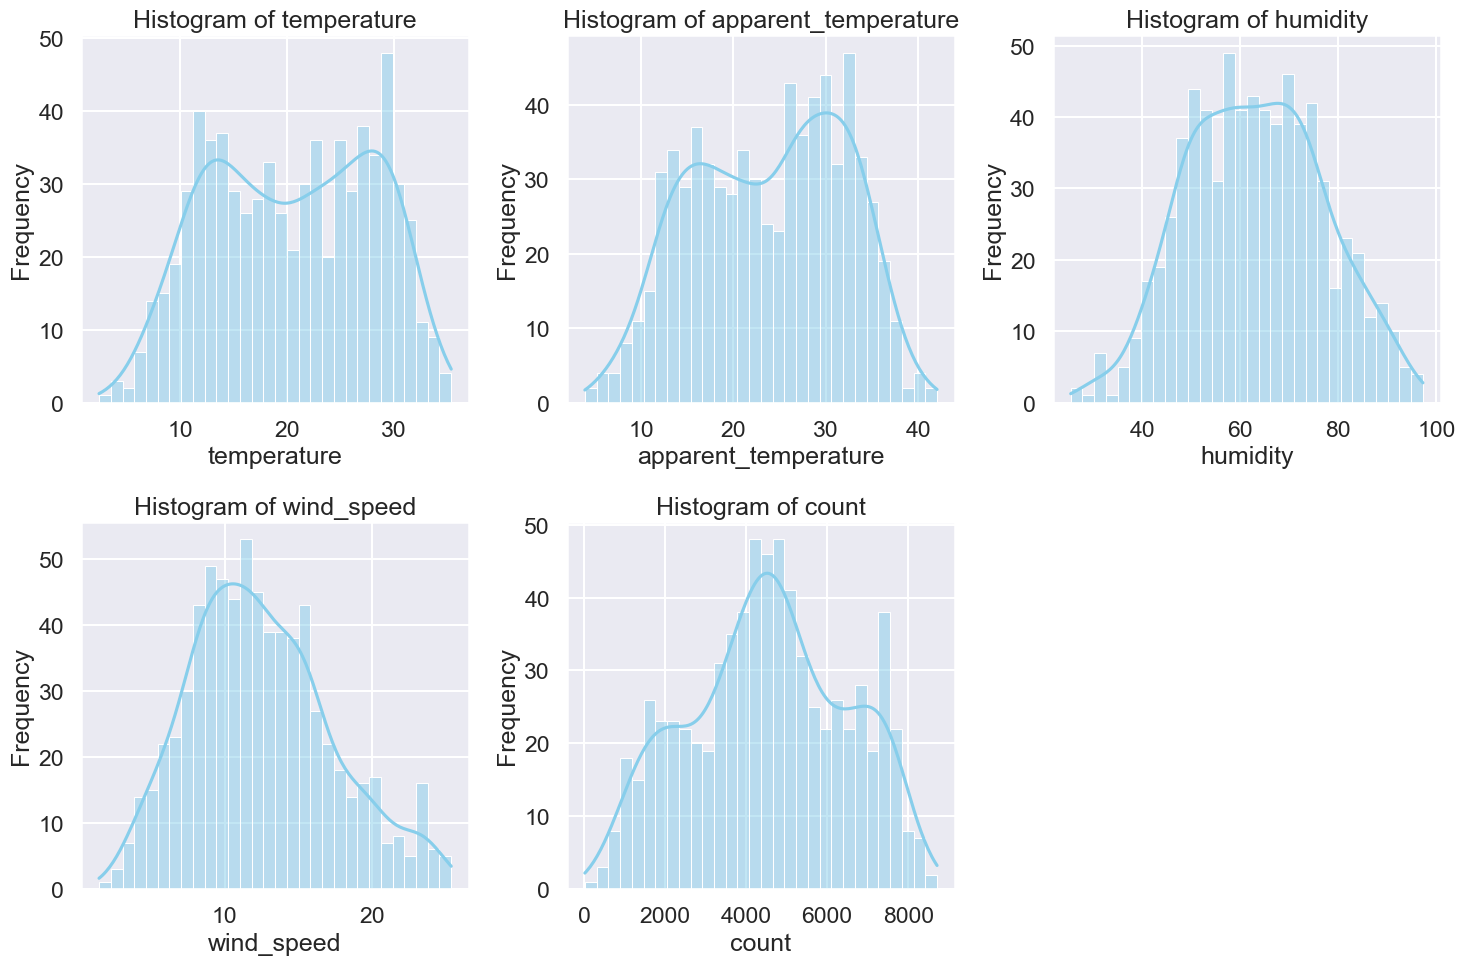

In [32]:
# Create a figure and axes
plt.figure(figsize=(15, 10))

# Loop through numerical columns and plot histograms
for i, column in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(bike_sharing[column], bins=30, color='skyblue', edgecolor='white', kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

In [33]:
bike_sharing['temperature'].skew()

-0.07195707343366815

In [34]:
bike_sharing['apparent_temperature'].skew()

-0.1431973182843936

In [35]:
bike_sharing['humidity'].skew()

0.05512601081969183

In [36]:
bike_sharing['wind_speed'].skew()

0.4402628212970665

In [37]:
bike_sharing['count'].skew()

-0.06133149338229405

#### OBSERVATIONS

1. `temperature`, `apparent_temperature` and `count` have **Multiple Peaks** and relatively **Low Skewness**.

2. `humidity` has **Low Skewness** and `wind_speed` has a **Moderate Positive Skewness**.

3. Highest Frequency of `count` is observed around 4000.

### CATEGORICAL FEATURES

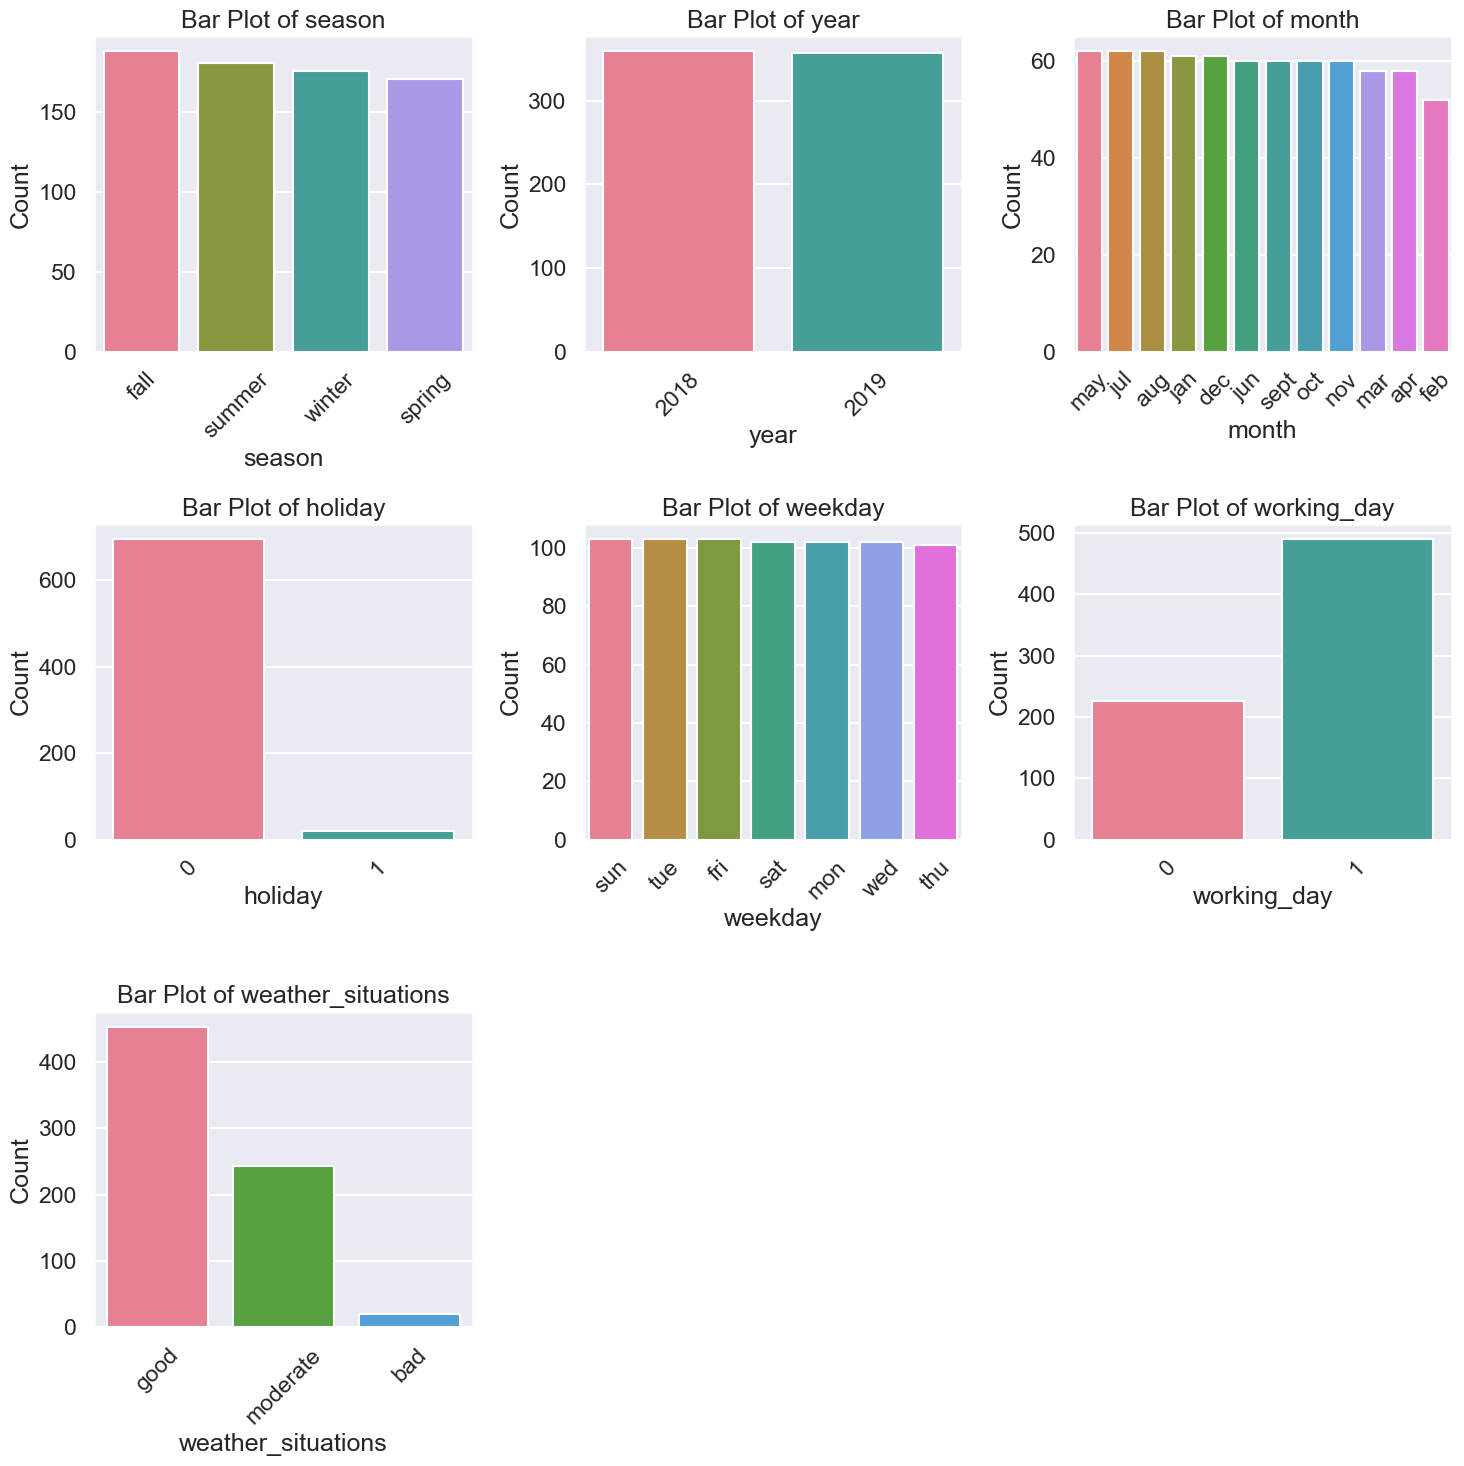

In [38]:
# Create a figure and axes
plt.figure(figsize=(15, 15))

# Loop through categorical columns and plot bar plots
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    
    # Calculate counts of each category
    count_data = bike_sharing[column].value_counts()
    
    # Create a bar plot
    sns.barplot(x=count_data.index, y=count_data.values, palette='husl')
    
    # Set title and labels
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='center')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

#### OBSERVATIONS

1. Demand is higher on the days when weather situations are **GOOD**.
2. Demand is higher on the **working days** and lower on the holidays and weekends.
3. Season, Year, Month, and Weekday has no significant impact on the demand for bikes.

## **<a id='bivariate-analysis'>B. BIVARIATE ANALYSIS<a/>**  [▲](#top)

### CORRELATION BETWEEN NUMERICAL FEATURES

***Correlation Criteria:*** Correlation Coefficient (r) measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where:

- 1: Perfect positive linear relationship
- -1: Perfect negative linear relationship
- 0: No linear relationship

***Common Criteria:***

- |r| < 0.1: Weak correlation; the relationship between the variables is minimal.
- 0.1 ≤ |r| < 0.3: Moderate correlation; some relationship exists, but it's not very strong.
- 0.3 ≤ |r| < 0.5: Strong correlation; there is a notable relationship between the variables.
- |r| ≥ 0.5: Very strong correlation; the variables are highly related.

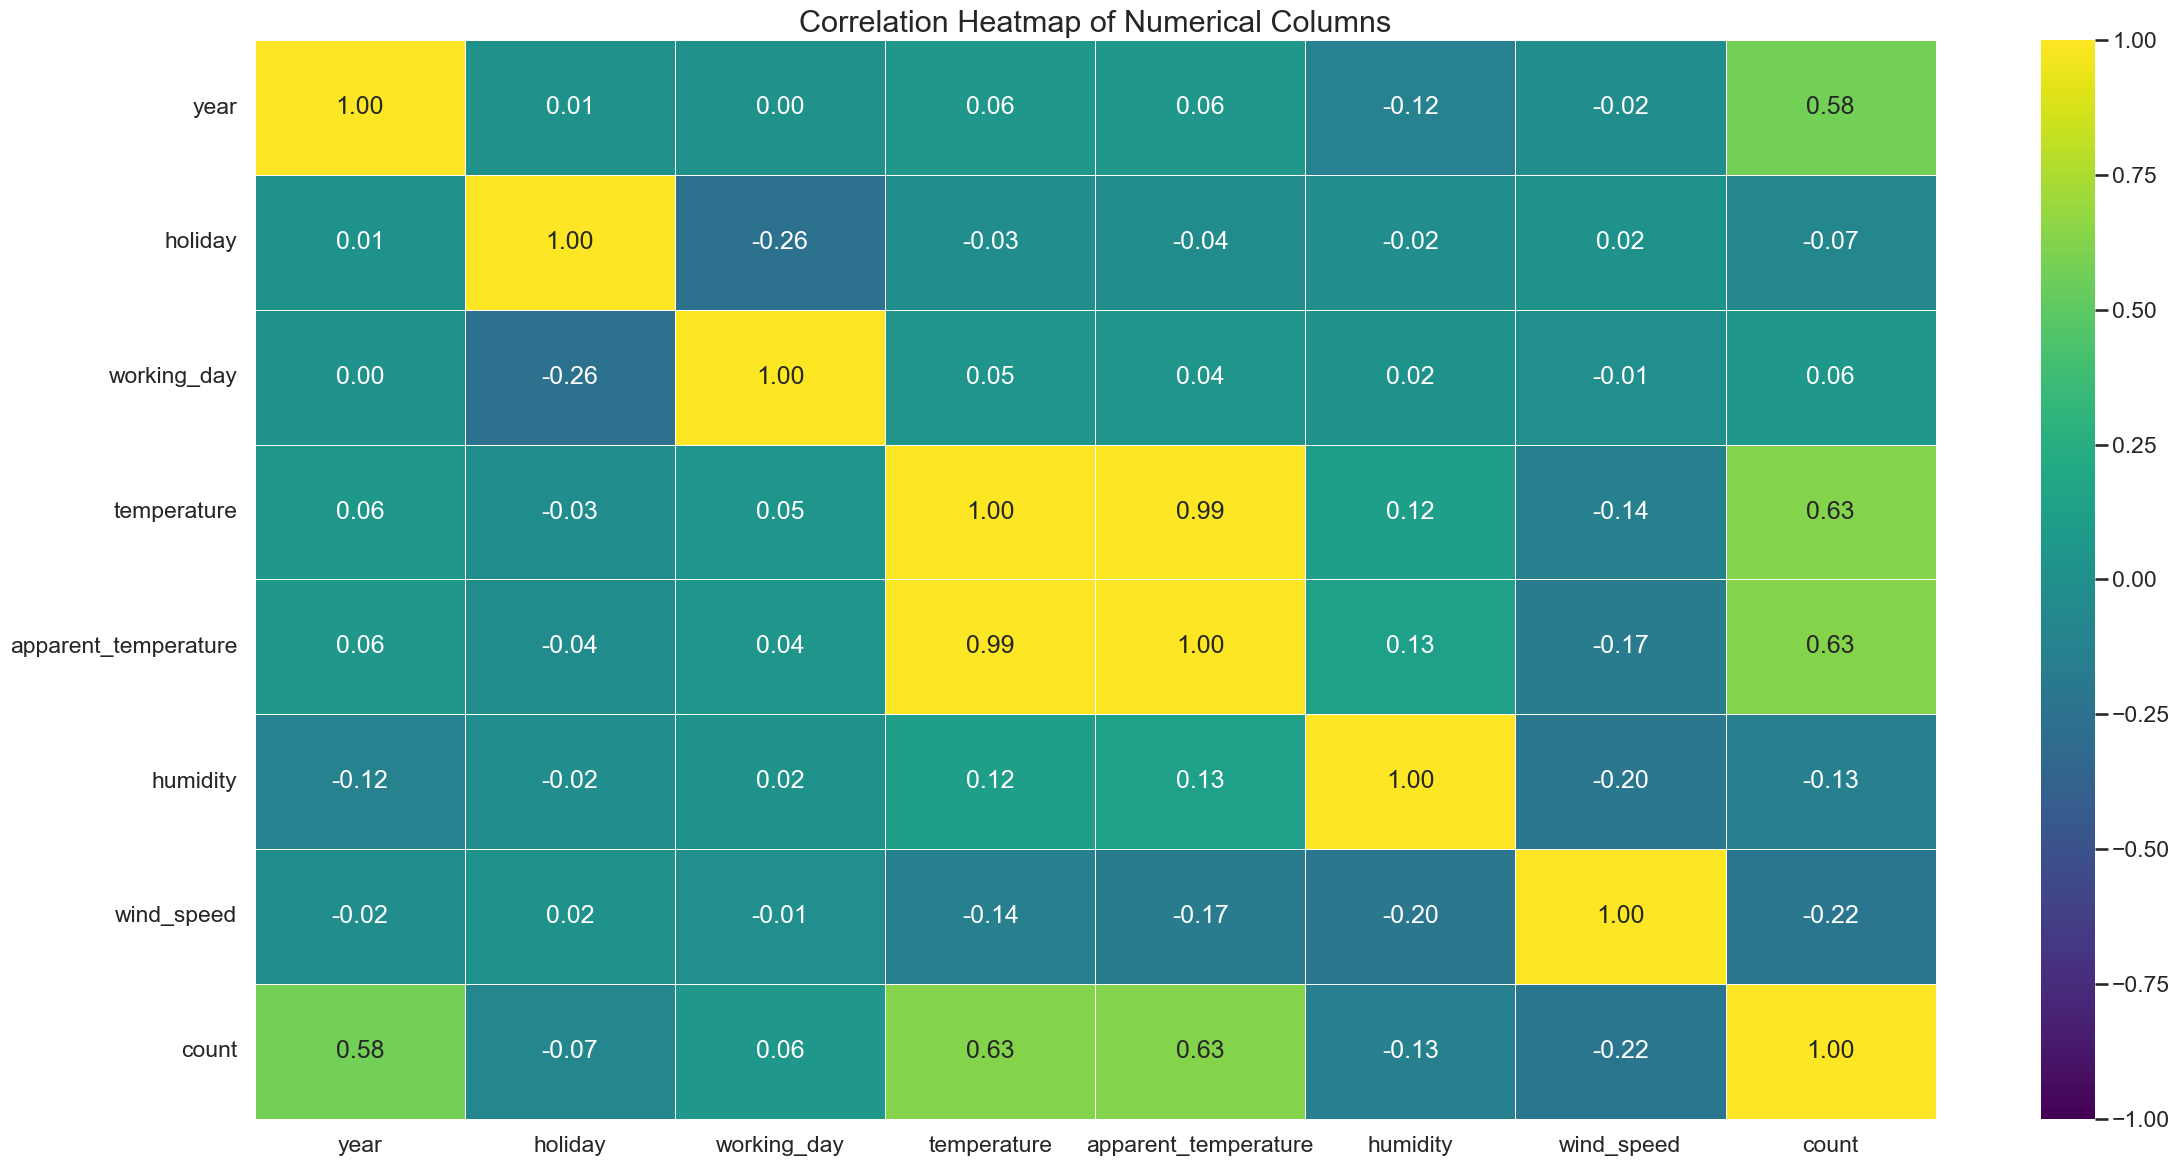

In [39]:
# Compute correlation matrix
corr_matrix = bike_sharing.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(24, 12))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of Numerical Columns', fontsize=22)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
bike_sharing['apparent_temperature'].corr(bike_sharing['temperature'])

0.9917319563911691

#### OBSERVATIONS

1. `count` shows significant positive correlations with `temperature` and `apparent_temperature`, moderate correlation with `year` and moderate inverse correlation with `wind_speed`.

2. Given that `temperature` and `apparent_temperature` are highly correlated with each other (approximately 1), we should consider dropping `apparent_temperature` before performing linear regression. This is because including both features in the model can lead to **multicollinearity**, which inflates the variance of the coefficient estimates and makes the model's predictions unstable and less interpretable. By dropping one of these highly correlated features, we can reduce multicollinearity, leading to more reliable and interpretable regression coefficients.

3.  `working_day` and `holiday` have a moderate negative correlation. 
4. `humidity` has moderate correlation with `wind_speed`, `year`, `temperature`, `apparent_teperature` and `count`. Hence it must be check for multicollinearity.

#### HANDLING UNWANTED MULTICOLLINEARITY

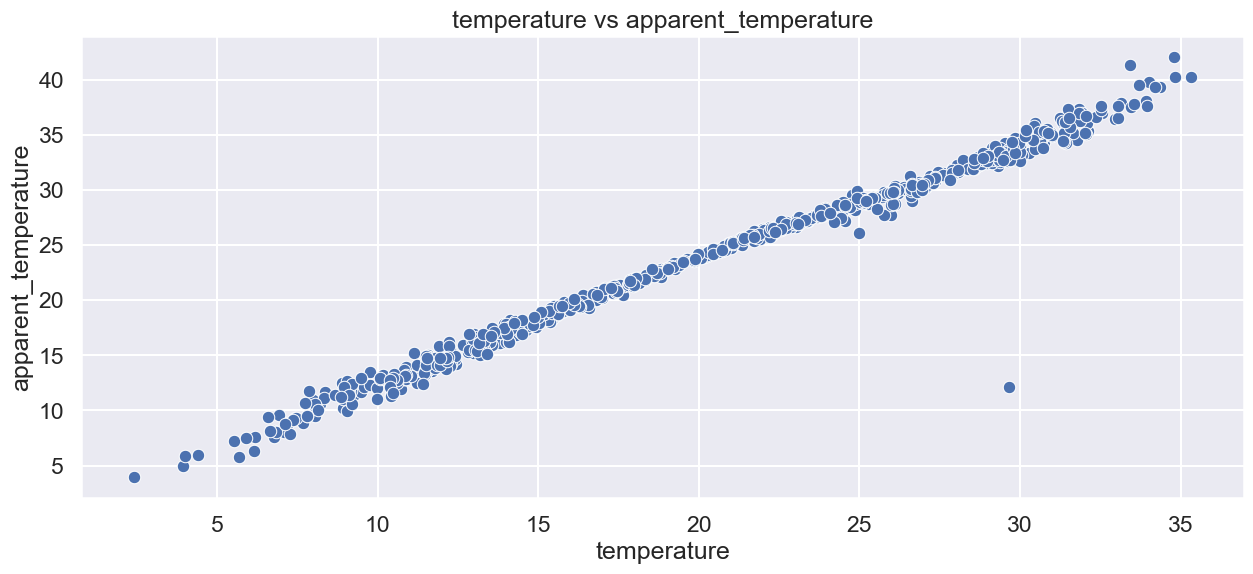

In [41]:
# Create a figure and axes
plt.figure(figsize=(15, 6))

# Create a scatterplot for `temperature` vs `apparent_temperature`
sns.scatterplot(x='temperature', y='apparent_temperature', data=bike_sharing)
plt.xlabel('temperature')
plt.ylabel('apparent_temperature')
plt.title(f'temperature vs apparent_temperature')

plt.show()

> Infering from the above correlation, it is appropriate to drop `apparent_temperature` as it has perfect correlation with `temperature`

In [42]:
bike_sharing.shape

(716, 12)

In [43]:
# Dropping `apparent_temperature`
bike_sharing.drop(columns='apparent_temperature', inplace=True)
num_cols.remove('apparent_temperature')

In [44]:
bike_sharing.shape

(716, 11)

### TARGET VS NUMERICAL FEATURES

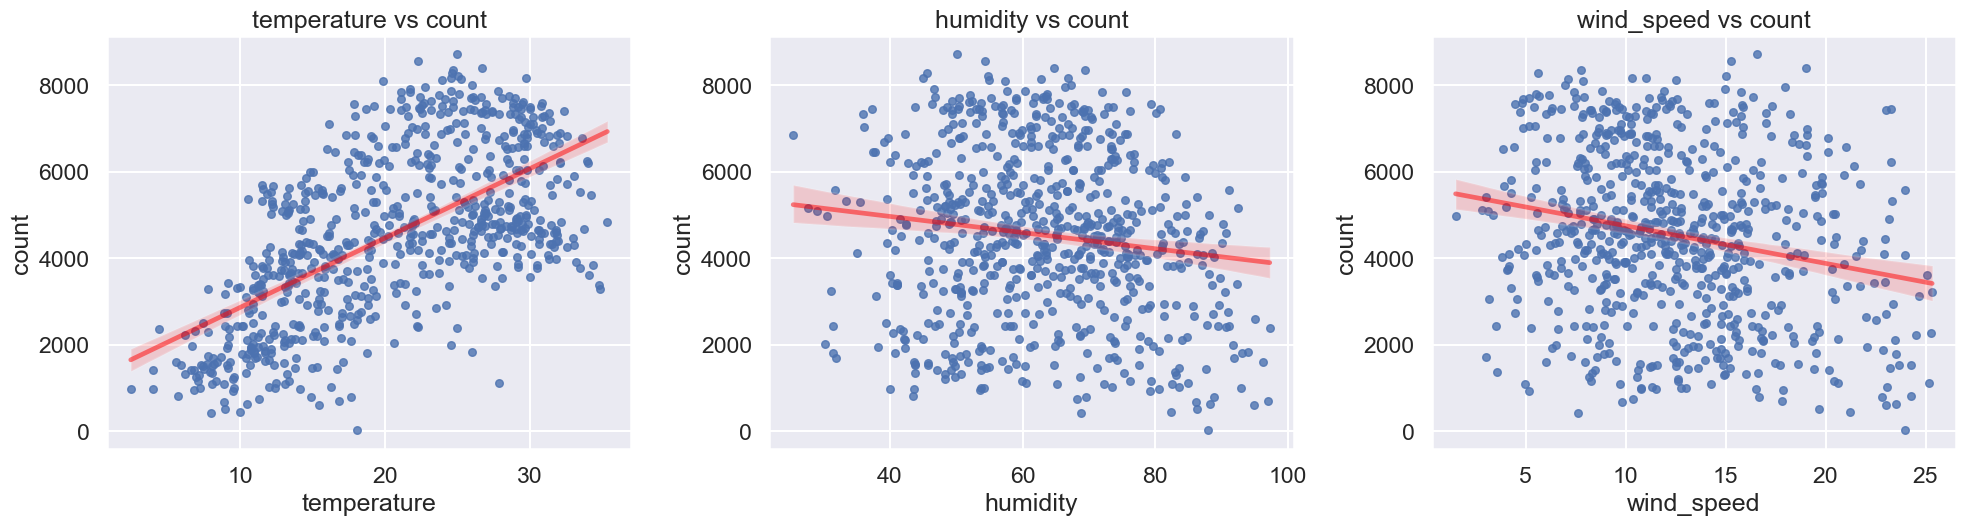

In [45]:
# Create a figure and axes
plt.figure(figsize=(20, 10))

# Create a regplot for each numerical column
y_col = 'count'
for i, x_col in enumerate(num_cols):
    if x_col is not 'count':
        plt.subplot(2, 3, i + 1)
        sns.regplot(x=x_col, y=y_col, data=bike_sharing, scatter_kws={'s':30}, line_kws={'color':'red', 'alpha':0.5})
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'{x_col} vs {y_col}')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

### TARGET VS CATEGORICAL FEATURES

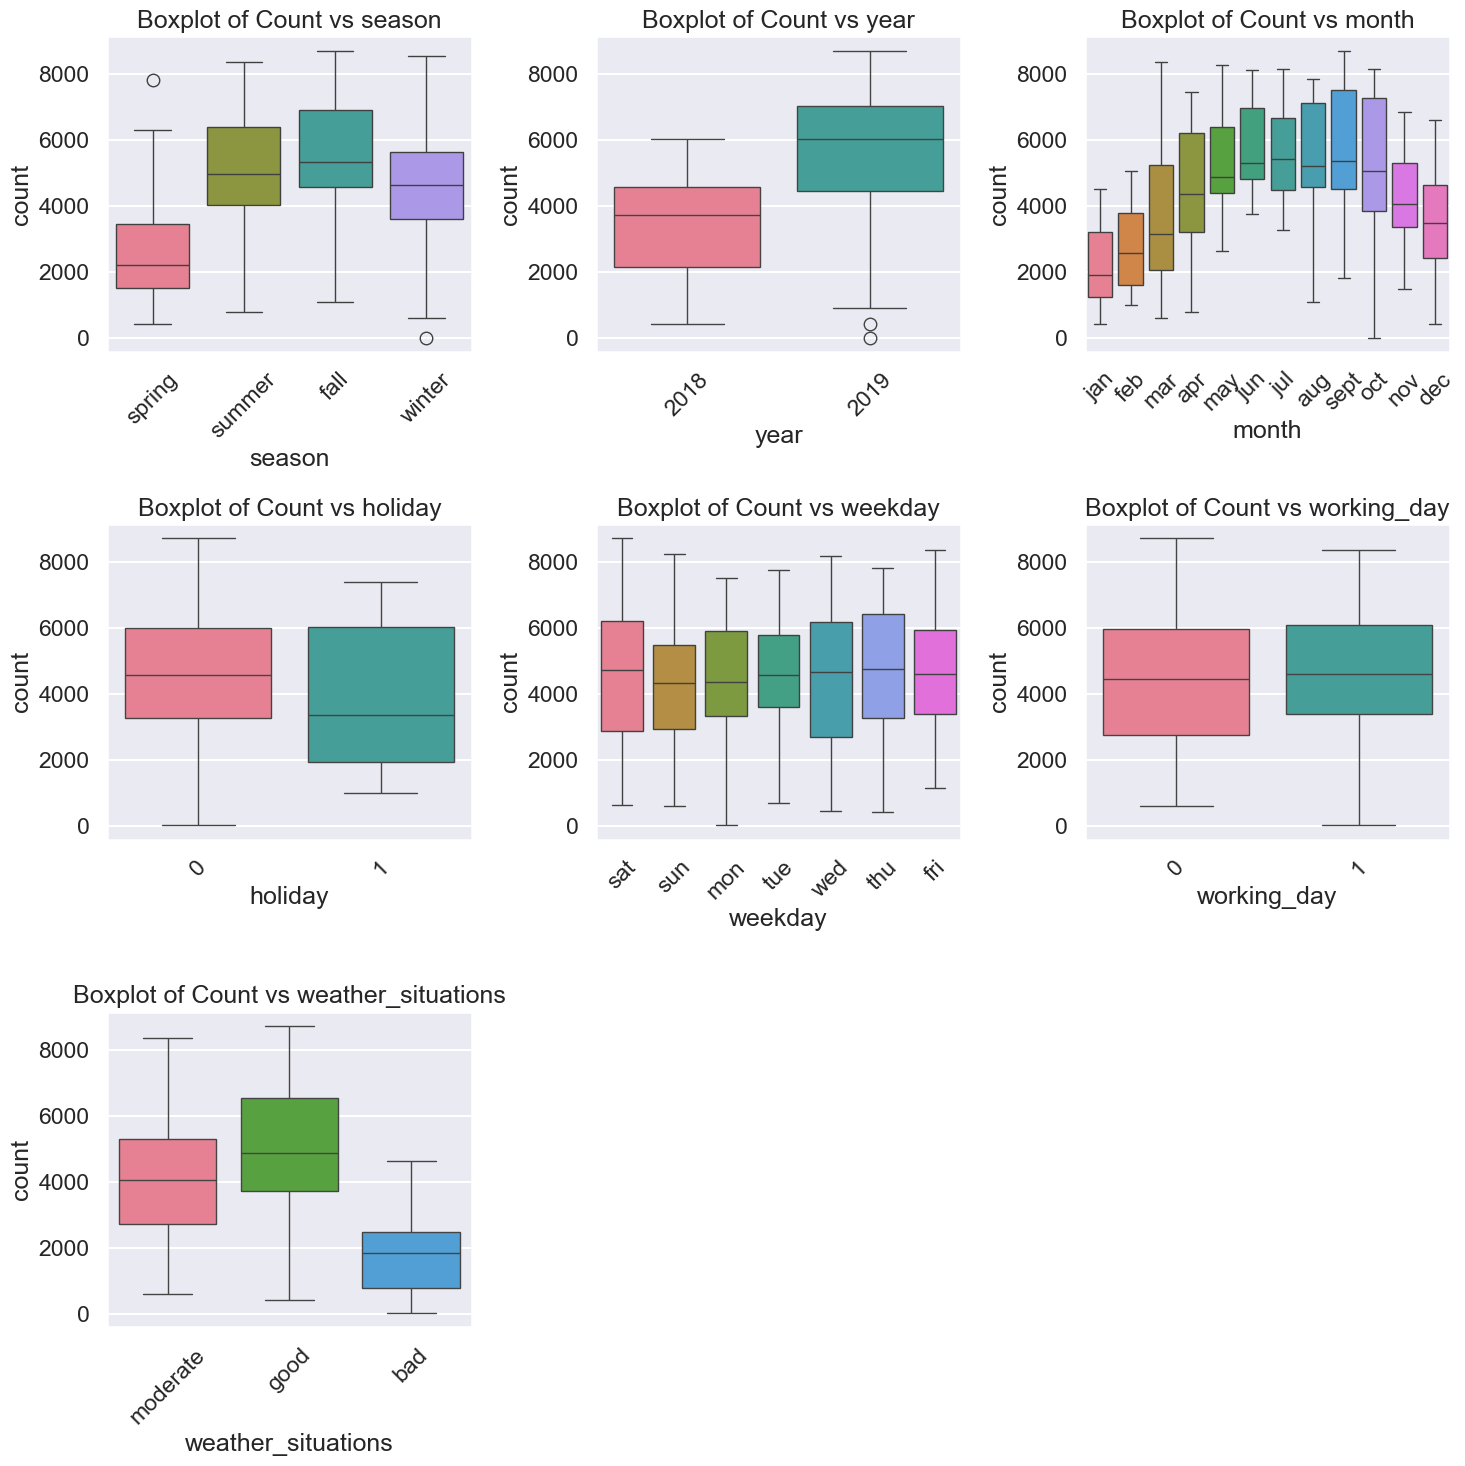

In [46]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Create a boxplot for each categorical column
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=column, y='count', data=bike_sharing, palette='husl')
    plt.title(f'Boxplot of Count vs {column}')
    plt.xticks(rotation=45, ha='center')

# Adjust layout to fit all subplots
plt.tight_layout()
plt.show()

#### OBSERVATIONS

1. Demand for bike rentals is highest in the **Fall Season**.
2. There is **Year-on-Year Increase** in demand between 2018 and 2019.
3. Demand is highest in the Dry months of **June-October**.
4. Though demand is low on Holidays, the boxplot shows high variability in distribution.
5. **Good Weather Situations** contribute to Higher demands.
6. Demand is variable by weekdays, working days and hence shows no interesting trends.

# **<a id='feature-engineering'>4. FEATURE ENGINEERING<a/>**  [▲](#top)

## **<a id='feature-encoding'>A. FEATURE ENCODING<a/>**  [▲](#top)

In [47]:
bike_sharing.head()

season  year month  holiday weekday  working_day weather_situations  \
0  spring  2018   jan        0     sat            0           moderate   
1  spring  2018   jan        0     sun            0           moderate   
2  spring  2018   jan        0     mon            1               good   
3  spring  2018   jan        0     tue            1               good   
4  spring  2018   jan        0     wed            1               good   

   temperature  humidity  wind_speed  count  
0    14.110847   80.5833   10.749882    985  
1    14.902598   69.6087   16.652113    801  
2     8.050924   43.7273   16.636703   1349  
3     8.200000   59.0435   10.739832   1562  
4     9.305237   43.6957   12.522300   1600

In [48]:
# The following code performs 3 things:
# 1) Creates Dummy variables
# 2) Drops the original variable for which the dummies were created
# 3) Drops the first dummy variable for each set of dummies created

bike_sharing = pd.get_dummies(data=bike_sharing, 
                              columns=['season', 'year','month'], 
                              drop_first=True,
                              dtype=int)

# Different approach for `weather_situations`, `weekday`
# All the three dummies created from `weather_situations` were significantly correlated to each other.
# Hence we remove the variables later on.
bike_sharing = pd.get_dummies(data=bike_sharing, 
                              columns=['weather_situations', 'weekday'],
                              dtype=int)
bike_sharing.head()

holiday  working_day  temperature  humidity  wind_speed  count  \
0        0            0    14.110847   80.5833   10.749882    985   
1        0            0    14.902598   69.6087   16.652113    801   
2        0            1     8.050924   43.7273   16.636703   1349   
3        0            1     8.200000   59.0435   10.739832   1562   
4        0            1     9.305237   43.6957   12.522300   1600   

   season_spring  season_summer  season_winter  year_2019  month_aug  \
0              1              0              0          0          0   
1              1              0              0          0          0   
2              1              0              0          0          0   
3              1              0              0          0          0   
4              1              0              0          0          0   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   
3          0          0          1          0          0          0   
4          0          0          1          0          0          0   

   month_may  month_nov  month_oct  month_sept  weather_situations_bad  \
0          0          0          0           0                       0   
1          0          0          0           0                       0   
2          0          0          0           0                       0   
3          0          0          0           0                       0   
4          0          0          0           0                       0   

   weather_situations_good  weather_situations_moderate  weekday_fri  \
0                        0                            1            0   
1                        0                            1            0   
2                        1                            0            0   
3                        1                            0            0   
4                        1                            0            0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
0            0            1            0            0            0   
1            0            0            1            0            0   
2            1            0            0            0            0   
3            0            0            0            0            1   
4            0            0            0            0            0   

   weekday_wed  
0            0  
1            0  
2            0  
3            0  
4            1

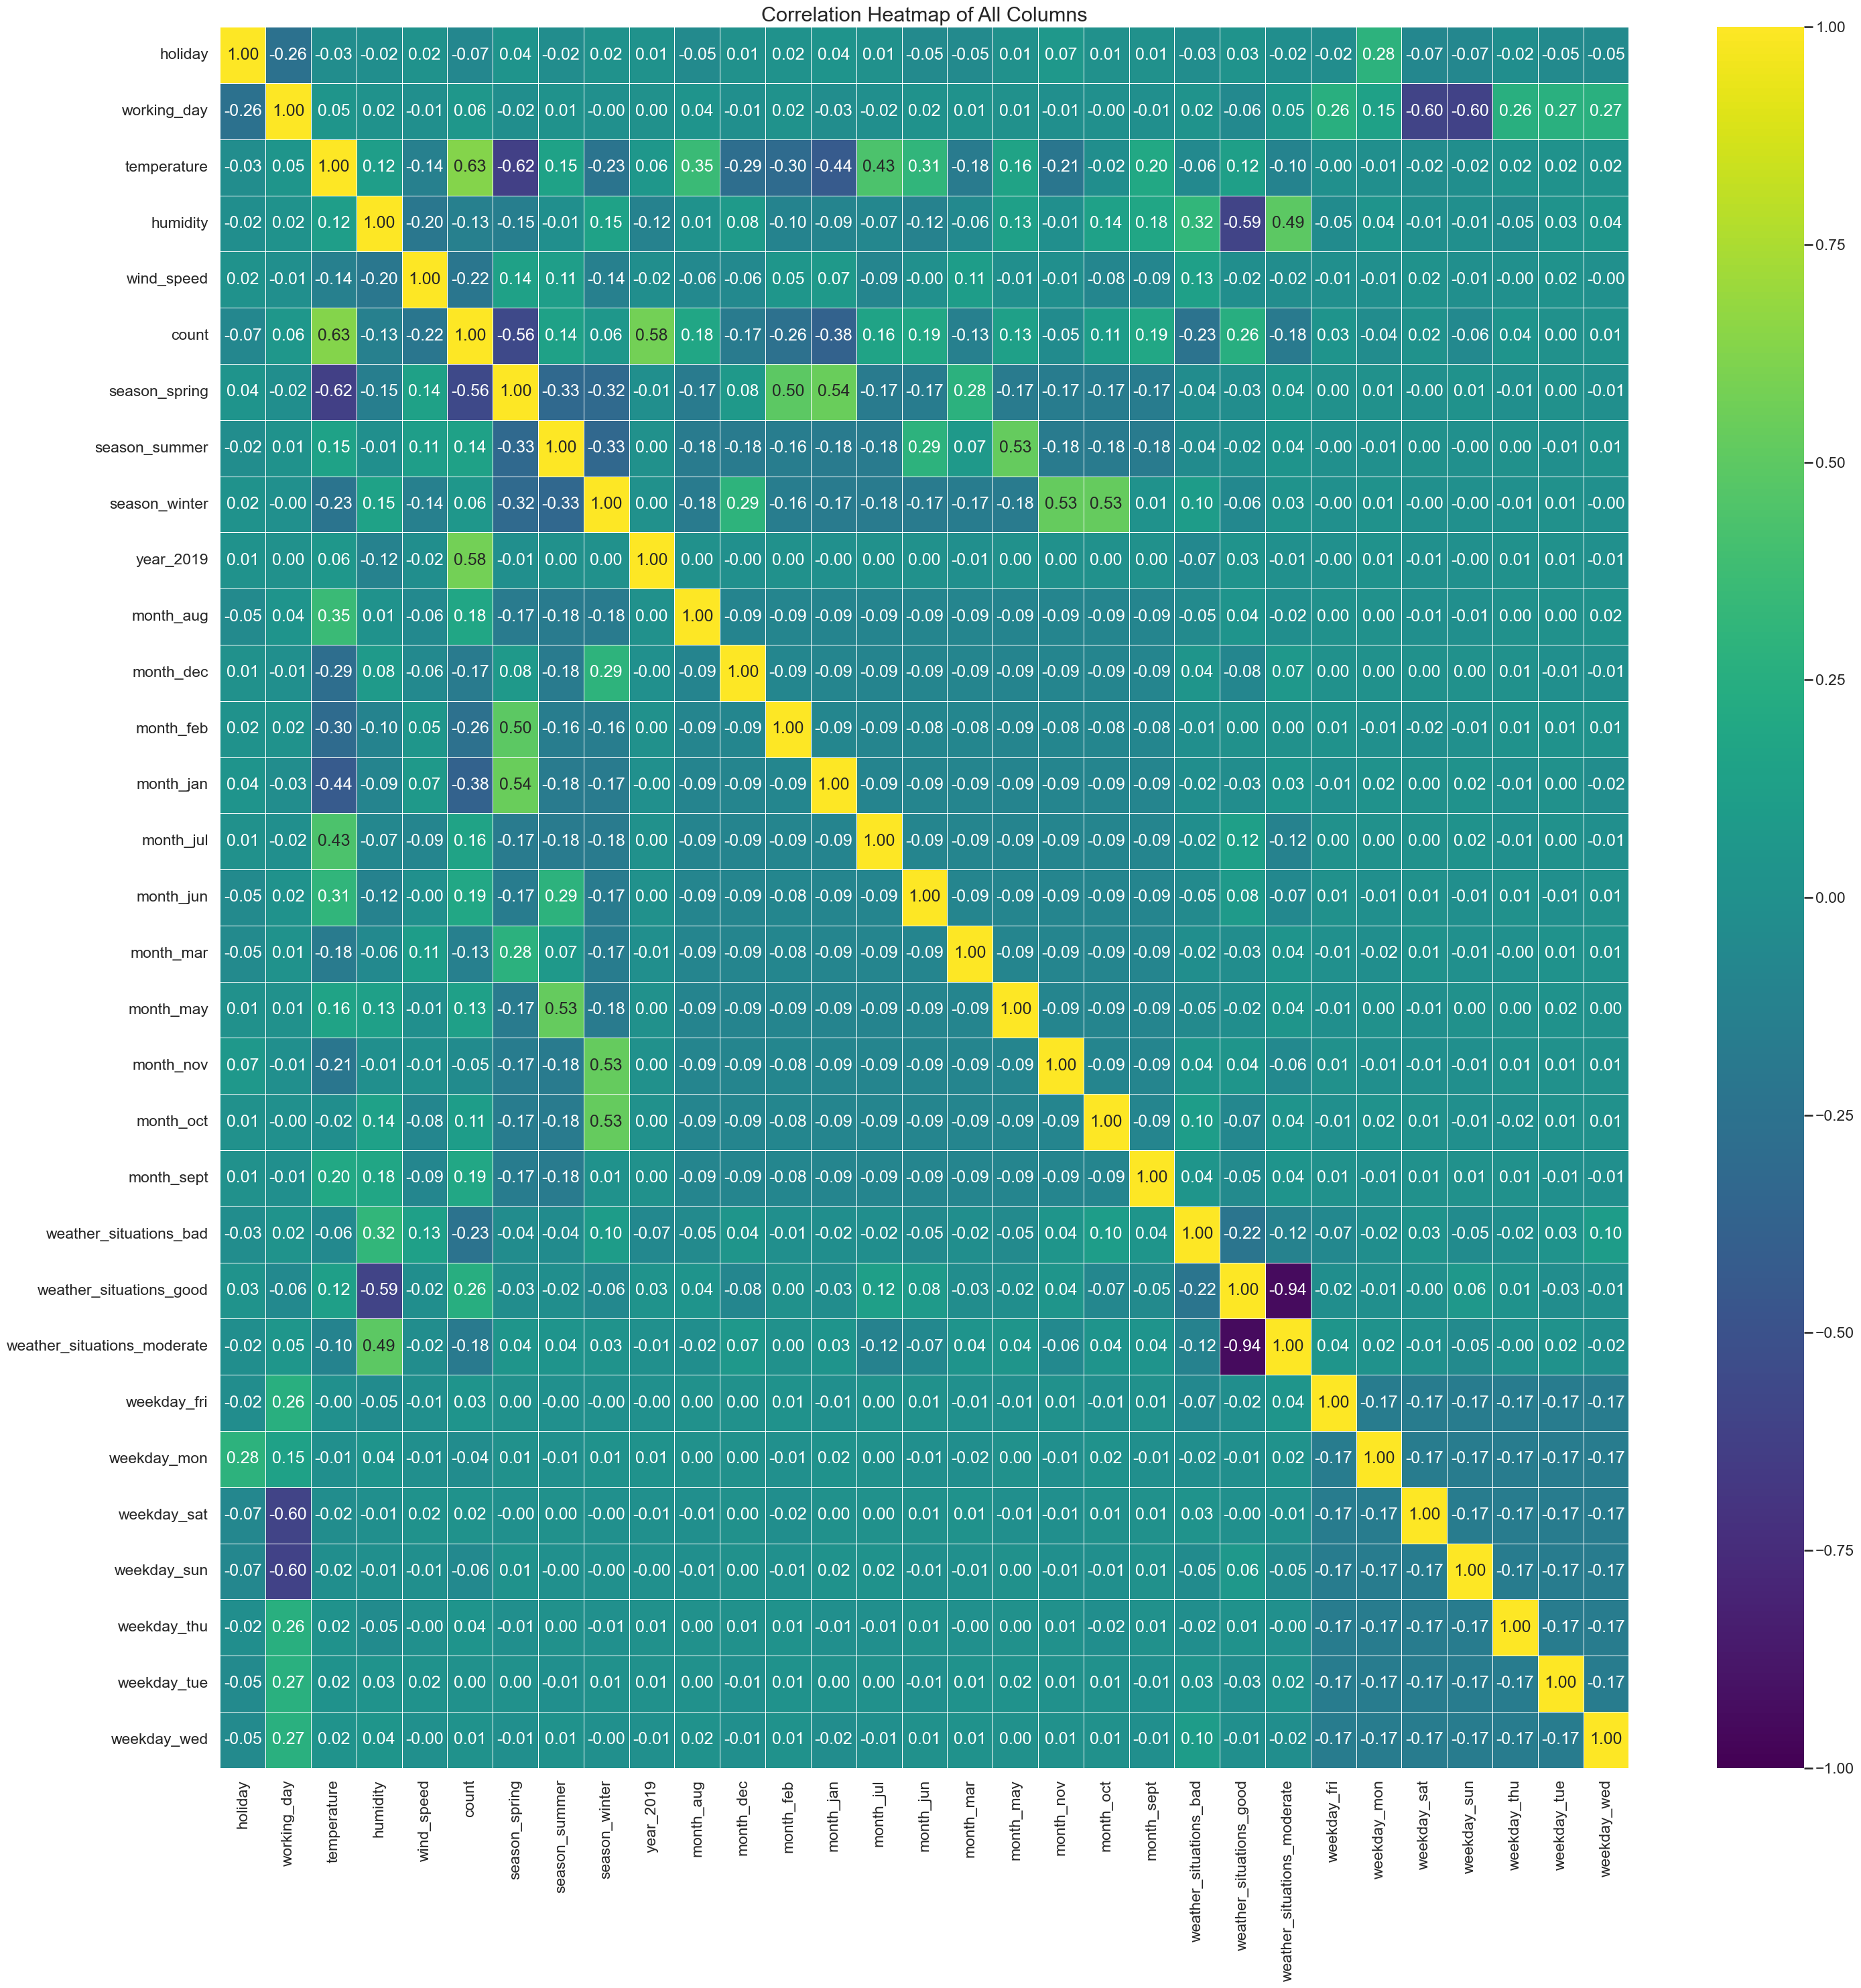

In [49]:
# Compute correlation matrix
corr_matrix = bike_sharing.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of All Columns', fontsize=22)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

***Correlation Criteria:***

- |r| < 0.1: Weak correlation; the relationship between the variables is minimal.
- 0.1 ≤ |r| < 0.3: Moderate correlation; some relationship exists, but it's not very strong.
- 0.3 ≤ |r| < 0.5: Strong correlation; there is a notable relationship between the variables.
- |r| ≥ 0.5: Very strong correlation; the variables are highly related.

#### OBSERVATIONS

1. **Count Variable:** Very Strong positive correlations with `temperature` and `year_2019`. Very Strong negative correlation with `season_spring`. 
2. **Season Spring and Temperature:** `season_spring` and `temperature` have a very strong negative correlation. Calculate VIF to check if including `season_spring` introduces multicollinearity with `temperature`.
3. **Weather Situations Dummies:** `weather_situations_moderate` has very strong negative correlation to `weather_situations_good`. Moreover, it is logically expected that `weather_situations_moderate` will be correlated to the other two, we need to drop it.
4. **Weather Situations and Humidity:** `humidity` has strong positive correlation with `weather_situations_moderate` and Moderate positive correlation exists between  and .
5. **Weekdays, Working Days and Holidays:** `working_day` has strong negative correlation to `weekday_sat` and `weekday_sun`, and moderate correlations to other weekdays and holidays.

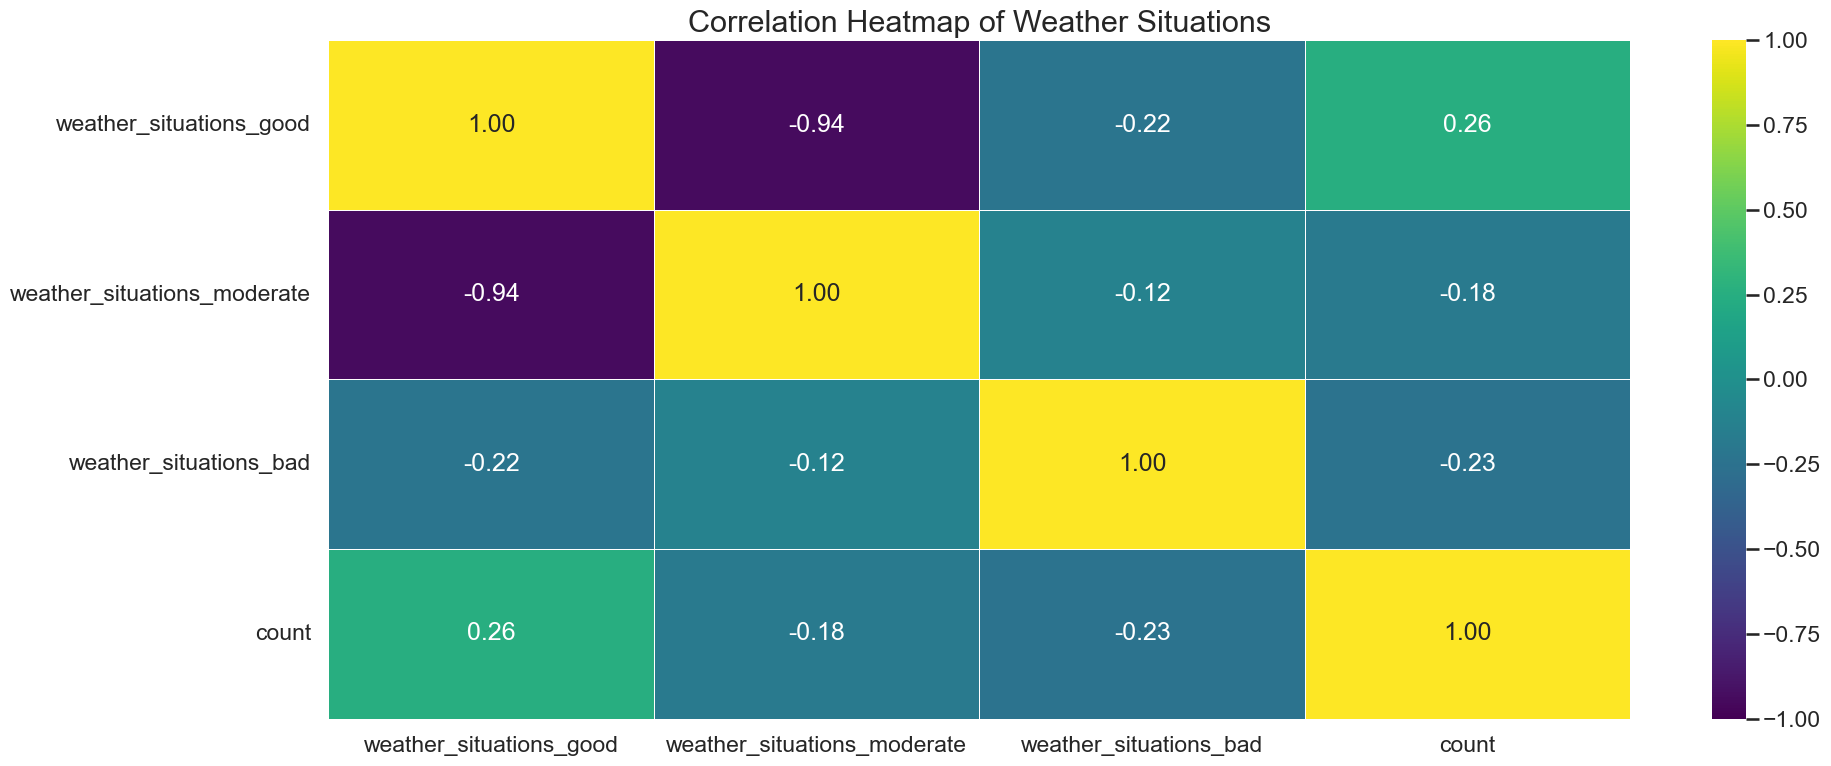

In [50]:
# Compute correlation matrix
corr_matrix = bike_sharing[['weather_situations_good', 'weather_situations_moderate', 'weather_situations_bad', 'count']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of Weather Situations', fontsize=22)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
# Dropping `weather_situations_moderate` since `count` has least correlation with this.
bike_sharing.drop('weather_situations_moderate', axis=1, inplace=True)

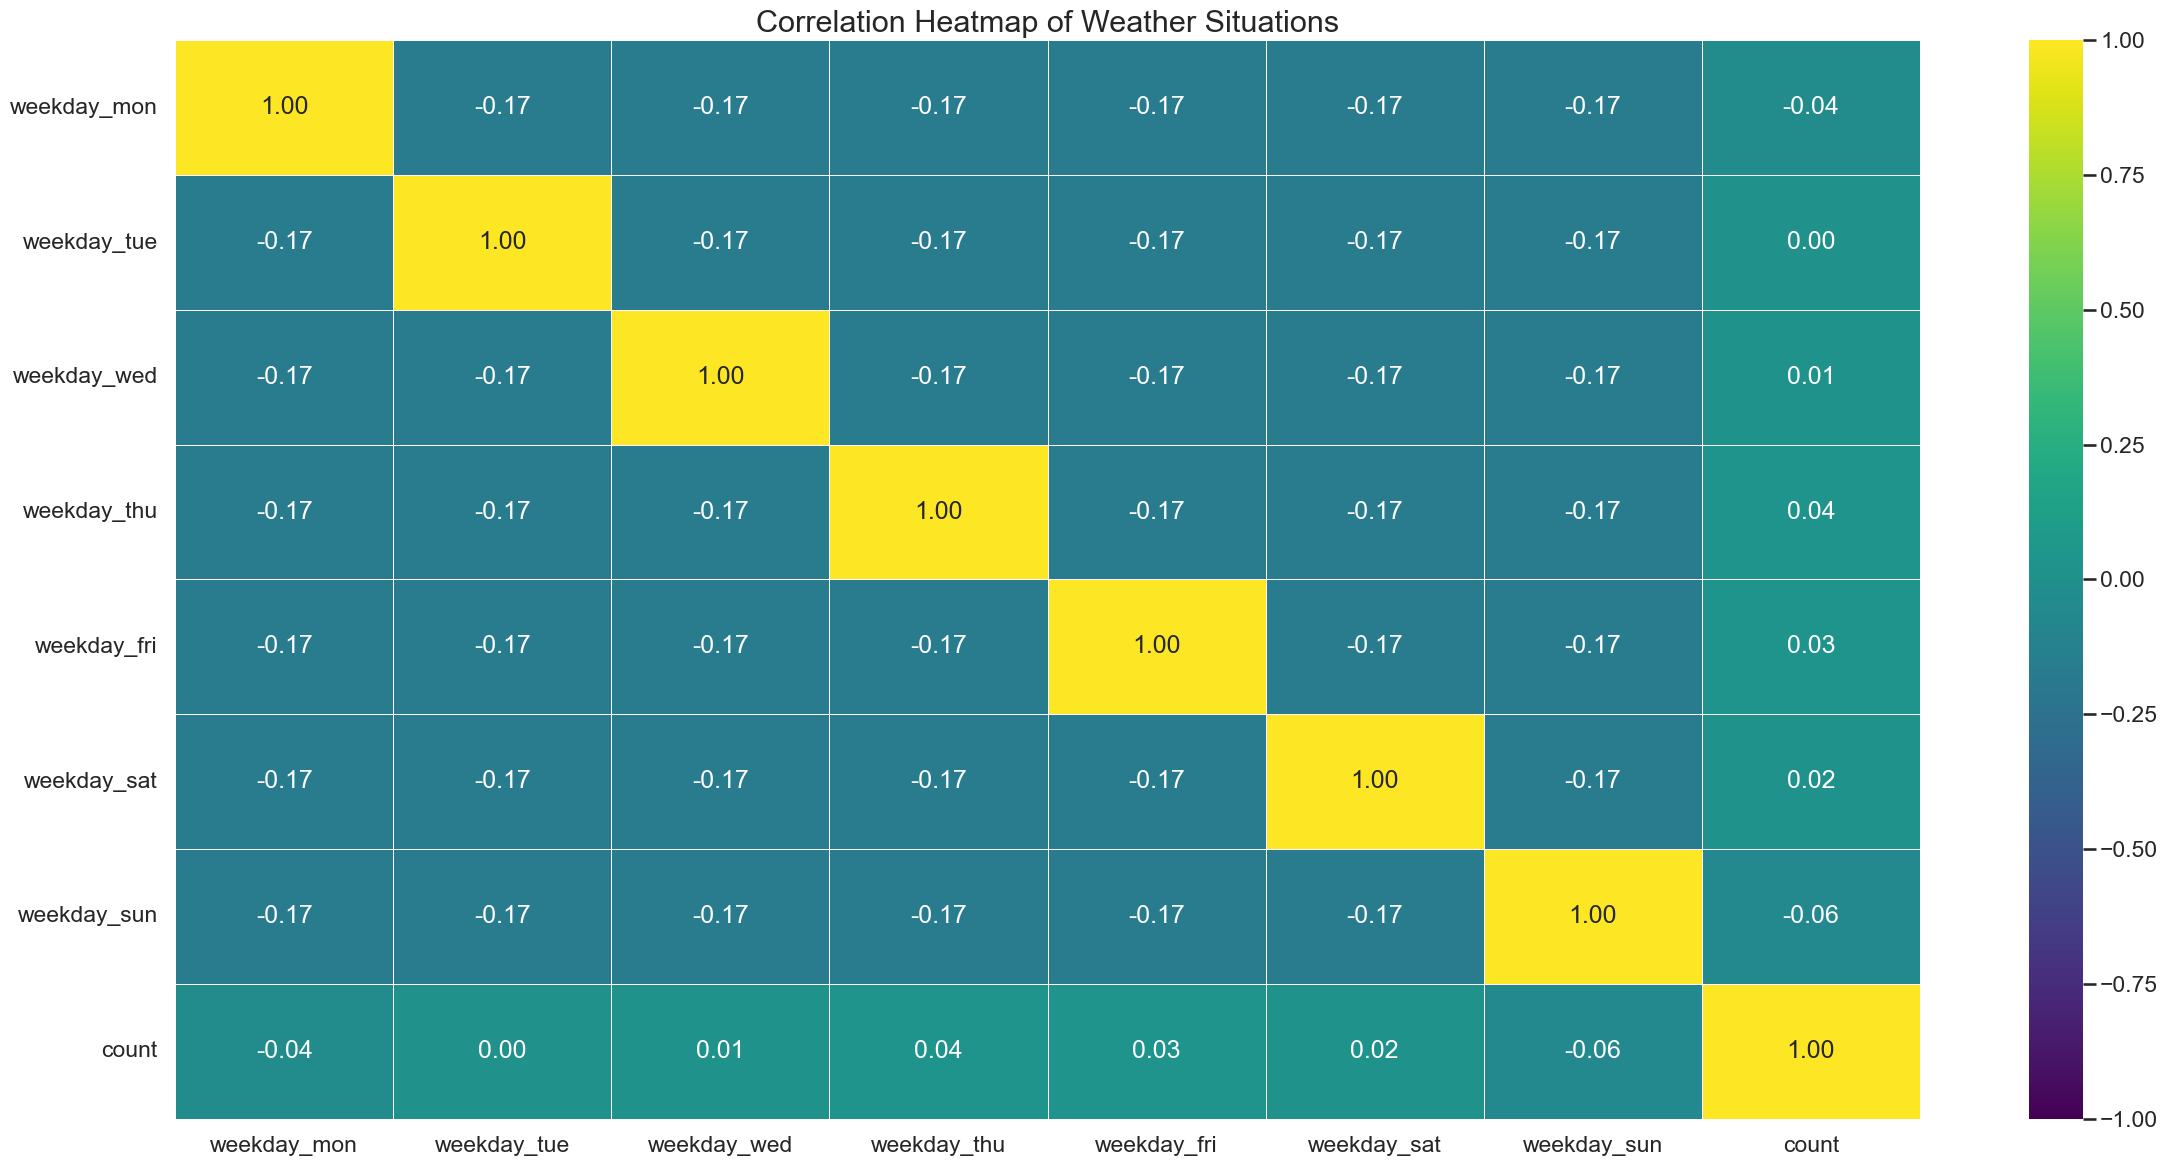

In [52]:
# Compute correlation matrix
corr_matrix = bike_sharing[['weekday_mon', 'weekday_tue', 'weekday_wed', 'weekday_thu', 
                            'weekday_fri', 'weekday_sat', 'weekday_sun','count']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(24, 12))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of Weather Situations', fontsize=22)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
# Dropping `weekday_tue` since `count` has least correlation with this.
bike_sharing.drop(['weekday_tue'], axis=1, inplace=True)

##  **<a id='feature-scaling'>B. FEATURE SCALING<a/>**  [▲](#top)

### TRAIN – TEST SPLIT

In [54]:
boom_bikes=bike_sharing.copy()

#Train Test split with 70:30 ratio
df_train, df_test = train_test_split(boom_bikes, train_size=0.7, random_state=100)

df_train.shape, df_test.shape

((501, 29), (215, 29))

### SCALE NUMERICAL FEATURES

#### Concept applied:

- **`fit():`** Computes parameters (e.g., mean, variance) from the data. You use `fit()` when you want to learn the parameters of the scaler or transformer based on the training data.
- **`transform():`** Applies the computed parameters to scale or transform data. You use `transform()` when you want to apply the learned scaling or transformation to new data, typically the test set.
- **`fit_transform():`** Combines fitting and transforming in one step for convenience. You use `fit_transform()` on the training data to simultaneously learn the parameters and transform the data. This is useful for preprocessing training data.

In [55]:
# Check data before scaling
df_train.head()

holiday  working_day  temperature  humidity  wind_speed  count  \
728        0            0    10.489153   48.3333   23.500518   1796   
541        0            1    25.864153   37.3333   23.292014   7442   
116        0            1    25.420000   83.5417   20.917400   3872   
718        0            1    13.530000   66.7917    8.875021   4128   
496        0            0    23.130847   48.0417    8.249911   7429   

     season_spring  season_summer  season_winter  year_2019  month_aug  \
728              1              0              0          1          0   
541              0              0              0          1          0   
116              0              1              0          0          0   
718              0              0              1          1          0   
496              0              1              0          1          0   

     month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
728          1          0          0          0          0          0   
541          0          0          0          0          1          0   
116          0          0          0          0          0          0   
718          1          0          0          0          0          0   
496          0          0          0          0          0          0   

     month_may  month_nov  month_oct  month_sept  weather_situations_bad  \
728          0          0          0           0                       0   
541          0          0          0           0                       0   
116          0          0          0           0                       0   
718          0          0          0           0                       0   
496          1          0          0           0                       0   

     weather_situations_good  weekday_fri  weekday_mon  weekday_sat  \
728                        1            0            0            0   
541                        1            0            0            0   
116                        0            0            0            0   
718                        0            0            0            0   
496                        1            0            0            1   

     weekday_sun  weekday_thu  weekday_wed  
728            1            0            0  
541            0            0            0  
116            0            0            1  
718            0            1            0  
496            0            0            0

In [56]:
scaler = MinMaxScaler()

# Fit and Transform the Training Set
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

# Check data after scaling
df_train.head()

holiday  working_day  temperature  humidity  wind_speed     count  \
728        0            0     0.252441  0.293114    0.923102  0.204096   
541        0            1     0.733702  0.126342    0.914353  0.853659   
116        0            1     0.719799  0.826912    0.814718  0.442936   
718        0            1     0.347624  0.572964    0.309436  0.472388   
496        0            0     0.648145  0.288693    0.283207  0.852163   

     season_spring  season_summer  season_winter  year_2019  month_aug  \
728              1              0              0          1          0   
541              0              0              0          1          0   
116              0              1              0          0          0   
718              0              0              1          1          0   
496              0              1              0          1          0   

     month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
728          1          0          0          0          0          0   
541          0          0          0          0          1          0   
116          0          0          0          0          0          0   
718          1          0          0          0          0          0   
496          0          0          0          0          0          0   

     month_may  month_nov  month_oct  month_sept  weather_situations_bad  \
728          0          0          0           0                       0   
541          0          0          0           0                       0   
116          0          0          0           0                       0   
718          0          0          0           0                       0   
496          1          0          0           0                       0   

     weather_situations_good  weekday_fri  weekday_mon  weekday_sat  \
728                        1            0            0            0   
541                        1            0            0            0   
116                        0            0            0            0   
718                        0            0            0            0   
496                        1            0            0            1   

     weekday_sun  weekday_thu  weekday_wed  
728            1            0            0  
541            0            0            0  
116            0            0            1  
718            0            1            0  
496            0            0            0

### DIVIDE INTO FEATURES AND TARGET VARIABLES

In [57]:
# Separate features and target in the training set
X_train = df_train.drop('count', axis=1)
y_train = df_train['count']

X_train.shape, y_train.shape

((501, 28), (501,))

## **<a id='feature-selection'>C. FEATURE SELECTION<a/>**  [▲](#top)

### AUTOMATED FEATURE ELIMINATION (Using RFE)

***Recursive Feature Elimination (RFE)*** is a feature selection technique that iteratively removes the least important features to improve model performance. It works by training the model, ranking features based on their importance, and eliminating those with the lowest rankings until a specified number of features remains. RFE helps reduce model complexity, prevent overfitting, and enhance interpretability by focusing on the most relevant predictors.

In [58]:
def perform_rfe(lr_model, X, y, n_features_to_select):
    """
    Perform Recursive Feature Elimination (RFE) with the provided linear regression model.

    Parameters:
    lr_model (object): The linear regression model to use with RFE. Should be an instance of sklearn's LinearRegression or similar.
    X (pd.DataFrame): DataFrame containing the feature set.
    y (pd.Series): Series containing the target variable.
    n_features_to_select (int): Number of features to select.

    Returns:
    pd.DataFrame: DataFrame with feature rankings and selection status.
    """
    # Initialize the RFE model
    rfe = RFE(estimator=lr_model, n_features_to_select=n_features_to_select)
    
    # Fit RFE
    rfe = rfe.fit(X, y)
    
    # Get the ranking of features
    ranking = rfe.ranking_
    
    # Get the selected features
    selected_features = X.columns[rfe.support_]
    
    # Create a DataFrame to display the ranking and selection status
    feature_df = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': ranking,
        'Selected': ['Yes' if selected else 'No' for selected in rfe.support_]
    })
    
    return feature_df.sort_values(by='Ranking')

### MANUAL FEATURE ELIMINATION (Using p–value and VIF)

***P-Value*** assesses the statistical significance of each feature in the model. A low p-value indicates that the feature is statistically significant in explaining the variability of the target variable.

**Common Criteria:**

- **`p-value < 0.01`**: Strong evidence against the null hypothesis; feature is highly significant.
- **`0.01 ≤ p-value < 0.05`**: Moderate evidence against the null hypothesis; feature is statistically significant.
- **`0.05 ≤ p-value < 0.10`**: Weak evidence against the null hypothesis; feature may be considered marginally significant.
- **`p-value ≥ 0.10`**: Weak evidence against the null hypothesis; feature is typically considered not significant and may be excluded.

---

***Variance Inflation Factor (VIF)*** measures how much the variance of an estimated regression coefficient increases due to multicollinearity. High VIF values indicate a high degree of multicollinearity.

**Common Criteria:**

1. **`VIF < 5`**: Generally considered acceptable; indicates low multicollinearity.
2. **`5 ≤ VIF < 10`**: Indicates moderate multicollinearity; may require attention or further investigation.
3. **`VIF ≥ 10`**: High multicollinearity; usually suggests that the feature should be considered for removal or further analysis.

---

### Analysis of P-Value and VIF Combinations

1. **High p-value, High VIF** (BAD FEATURES): The feature is not statistically significant and suffers from high multicollinearity. This combination suggests that the feature is not a useful predictor and is influenced by other features. It becomes a candidate for removal from the model due to both lack of significance and problematic multicollinearity.

2. **High p-value, Low VIF**(LOW PRIORITY FEATURES): The feature is not statistically significant but does not suffer from multicollinearity. This combination indicates that while the feature does not contribute significantly to explaining the target variable, it is not affected by multicollinearity. It might be worth considering for removal due to its lack of significance, but multicollinearity is not a concern.

3. **Low p-value, High VIF**(MODERATE PRIORITY FEATURES): The feature is statistically significant but has high multicollinearity. This combination suggests that while the feature is important in explaining the target variable, it is highly correlated with other features, which could inflate its coefficient estimates. It may be useful to retain the feature but consider techniques to address multicollinearity, such as removing correlated features or applying dimensionality reduction techniques.

4. **Low p-value, Low VIF** (GOOD FEATURES): The feature is statistically significant and does not suffer from multicollinearity. This is an ideal scenario where the feature is both a strong predictor and well-behaved in terms of collinearity. Features in this category are generally retained in the model as they provide valuable and reliable information.


In [59]:
def calculate_pvalues_and_vif(X, lr_model):
    """
    Calculate and return a DataFrame with Variance Inflation Factor (VIF) and p-values for each feature in the DataFrame.
    
    Parameters:
    X (pd.DataFrame): DataFrame containing the feature set.
    lr_model (statsmodels.regression.linear_model.OLS): Fitted linear regression model.
    
    Returns:
    pd.DataFrame: DataFrame with features, their corresponding VIF values, and p-values, sorted by VIF and p-value.
    """
    # Add a constant to the model (intercept)
    X_with_const = sm.add_constant(X)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_with_const.columns
    vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    
    # Get p-values of the features
    p_values = round(lr_model.pvalues, 4)
    
    # Create a DataFrame to display the p-values
    p_value_df = pd.DataFrame({
        'Feature': X_with_const.columns,
        'P-Value': p_values
    })
    
    # Merge the VIF and p-value DataFrames
    merged_df = pd.merge(vif_data, p_value_df, on='Feature')
    
    # Sort the DataFrame by VIF (descending) and p-value (ascending)
    feature_df = merged_df.sort_values(by=['P-Value', 'VIF'], ascending=[False, False])
    
    return feature_df

### FUNCTION TO BUILD A LINEAR REGRESSION MODEL

In [60]:
def build_lr_model(X, y, method='statsmodels'):
    """
    Build and fit a linear regression model using the specified method.

    Parameters:
    X (pd.DataFrame): DataFrame containing the feature set.
    y (pd.Series): Series containing the target variable.
    method (str): The method to use for building the model. Options are:
                  - 'statsmodels': Uses statsmodels OLS to fit the model.
                  - 'sklearn': Uses sklearn's LinearRegression to fit the model.

    Returns:
    model: The fitted model object. The type of object returned depends on the method used:
           - If 'statsmodels', returns a sm.OLS object.
           - If 'sklearn', returns a sklearn.linear_model.LinearRegression object.
    """
    if method == 'sklearn':
        lr_model = LinearRegression()
        lr_model.fit(X, y)
        # Print summary statistics for sklearn model
        print('Linear Regression Model (sklearn):')
        print(f'Intercept: {lr_model.intercept_}')
        print(f'Coefficients: {lr_model.coef_}')
    elif method == 'statsmodels':
        # Add a constant to the model (intercept)
        X_with_const = sm.add_constant(X)
        # Fit the model using statsmodels OLS
        lr_model = sm.OLS(y, X_with_const).fit()
        # Print the summary statistics for statsmodels model
        print('Linear Regression Model (statsmodels):')
        print(lr_model.summary())
    else:
        raise ValueError('Invalid method specified. Use \'statsmodels\' or \'sklearn\'.')
    
    return lr_model

### FEATURE SELECTION USING MANUAL FEATURE SELECTION METHOD

In this we used all the features and used the Manual Feature Selection method to select the features

In [61]:
len(X_train.columns)

28

In [62]:
# Build baseline linear regression model using statsmodels
base_model_sm = build_lr_model(X_train, y_train)
feature_df = calculate_pvalues_and_vif(X_train, base_model_sm)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     108.7
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          8.61e-184
Time:                        23:25:05   Log-Likelihood:                 528.87
No. Observations:                 501   AIC:                            -1002.
Df Residuals:                     473   BIC:                            -883.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Feature        VIF  P-Value
1                   holiday        inf   0.9824
10                month_aug   6.234004   0.8344
15                month_jun   2.970786   0.7746
7             season_summer   8.296988   0.7287
16                month_mar   3.155911   0.6375
19                month_oct   5.907266   0.6107
27              weekday_thu   1.838518   0.5877
28              weekday_wed   1.823241   0.4040
24              weekday_mon   2.031289   0.3248
12                month_feb   4.438640   0.3182
14                month_jul   6.624984   0.2945
23              weekday_fri   1.857429   0.2410
17                month_may   2.403330   0.1888
11                month_dec   5.812239   0.0457
20               month_sept   5.336898   0.0405
13                month_jan   6.099402   0.0388
18                month_nov   6.835622   0.0151
6             season_spring  10.520144   0.0134
26              weekday_sun        inf   0.0105
2               working_day        inf   0.0000
25              weekday_sat        inf   0.0000
8             season_winter   8.694446   0.0000
3               temperature   7.561200   0.0000
4                  humidity   2.269373   0.0000
22  weather_situations_good   1.737463   0.0000
5                wind_speed   1.235196   0.0000
21   weather_situations_bad   1.217516   0.0000
9                 year_2019   1.074277   0.0000
0                     const   0.000000   0.0000

In [63]:
# High VIF and High P-Value = Bad Features
feature_df[(feature_df['VIF'] > 5) & (feature_df['P-Value'] > 0.05)]

Feature       VIF  P-Value
1         holiday       inf   0.9824
10      month_aug  6.234004   0.8344
7   season_summer  8.296988   0.7287
19      month_oct  5.907266   0.6107
14      month_jul  6.624984   0.2945

In [64]:
# Exclude 'holiday', 'month_aug', 'season_summer', 'month_oct', 'month_jul' from the list of features
exclude_features = ['holiday', 'month_aug', 'season_summer', 'month_oct', 'month_jul', 'const']
selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 'Feature'].tolist()
selected_features

['month_jun',
 'month_mar',
 'weekday_thu',
 'weekday_wed',
 'weekday_mon',
 'month_feb',
 'weekday_fri',
 'month_may',
 'month_dec',
 'month_sept',
 'month_jan',
 'month_nov',
 'season_spring',
 'weekday_sun',
 'working_day',
 'weekday_sat',
 'season_winter',
 'temperature',
 'humidity',
 'weather_situations_good',
 'wind_speed',
 'weather_situations_bad',
 'year_2019']

### FEATURE SELECTION USING RFE METHOD

In here, we used the selected features from the above model and performed the RFE method to eliminate the features.

In [65]:
# Select the required features
X_train_enhanced = X_train[selected_features]

# Build first linear regression model using statsmodels
base_model_sk = build_lr_model(X_train_enhanced, y_train, method='sklearn')
feature_df = perform_rfe(base_model_sk, X_train_enhanced, y_train, n_features_to_select=15)
feature_df

Linear Regression Model (sklearn):
Intercept: 0.21165601428121494
Coefficients: [ 0.01366641  0.02073561 -0.00628042  0.01351785 -0.01440635 -0.02675771
  0.01731428  0.04695898 -0.05900135  0.07892157 -0.06636473 -0.07728922
 -0.08433738  0.03576729  0.06909138  0.09669134  0.09922844  0.39728236
 -0.12341409  0.04449438 -0.11593546 -0.16502107  0.23065183]


Feature  Ranking Selected
11                month_nov        1      Yes
20               wind_speed        1      Yes
19  weather_situations_good        1      Yes
18                 humidity        1      Yes
17              temperature        1      Yes
16            season_winter        1      Yes
15              weekday_sat        1      Yes
14              working_day        1      Yes
13              weekday_sun        1      Yes
12            season_spring        1      Yes
21   weather_situations_bad        1      Yes
22                year_2019        1      Yes
9                month_sept        1      Yes
8                 month_dec        1      Yes
10                month_jan        1      Yes
5                 month_feb        2       No
7                 month_may        3       No
1                 month_mar        4       No
6               weekday_fri        5       No
3               weekday_wed        6       No
0                 month_jun        7       No
4               weekday_mon        8       No
2               weekday_thu        9       No

In [66]:
# Exclude Not Selected features from the list of features
selected_features = feature_df.loc[feature_df['Selected'] == 'Yes', 'Feature'].tolist()
selected_features

['month_nov',
 'wind_speed',
 'weather_situations_good',
 'humidity',
 'temperature',
 'season_winter',
 'weekday_sat',
 'working_day',
 'weekday_sun',
 'season_spring',
 'weather_situations_bad',
 'year_2019',
 'month_sept',
 'month_dec',
 'month_jan']

# **<a id='model-building'>5. MODEL BUILDING<a/>**  [▲](#top)

In [67]:
# Dictionary for all fitted models
models = {}

# np.of predictors
no_of_predictors = {}

# linear regressions features
lr_features = {}
lr_features['lr_model_1'] = selected_features

## **<a id='model-1'>MODEL 1 (base)<a/>**  [▲](#top)

In Model 1, we used the selected features from the above Model and performed the Manual Feature Elimination method to eliminate the features.

In [68]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_1'] = len(selected_features)

# Build another linear regression model
models['lr_model_1'] = lr_model_1 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_1)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          1.21e-191
Time:                        23:25:06   Log-Likelihood:                 516.39
No. Observations:                 501   AIC:                            -1001.
Df Residuals:                     485   BIC:                            -933.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Feature        VIF  P-Value
9               weekday_sun   4.820583   0.0563
8               working_day   7.300668   0.0004
15                month_jan   1.649560   0.0004
14                month_dec   1.458457   0.0004
0                     const  90.829043   0.0000
7               weekday_sat   4.775506   0.0000
5               temperature   3.055906   0.0000
10            season_spring   2.848531   0.0000
6             season_winter   2.323793   0.0000
4                  humidity   2.006986   0.0000
1                 month_nov   1.791802   0.0000
3   weather_situations_good   1.667661   0.0000
2                wind_speed   1.183781   0.0000
11   weather_situations_bad   1.180443   0.0000
13               month_sept   1.102937   0.0000
12                year_2019   1.056228   0.0000

In [69]:
# Exclude 'weekday_sun' from the list of features
exclude_features = ['weekday_sun', 'const']
lr_features['lr_model_2'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['working_day',
 'month_jan',
 'month_dec',
 'weekday_sat',
 'temperature',
 'season_spring',
 'season_winter',
 'humidity',
 'month_nov',
 'weather_situations_good',
 'wind_speed',
 'weather_situations_bad',
 'month_sept',
 'year_2019']

## **<a id='model-2'>MODEL 2<a/>**  [▲](#top)

In Model 2, we used the selected features from the above Model and performed the Manual Feature Elimination method to eliminate the features.

In [70]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_2'] = len(selected_features)

# Build another linear regression model
models['lr_model_2'] = lr_model_2 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_2)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     201.5
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          5.13e-192
Time:                        23:25:06   Log-Likelihood:                 514.50
No. Observations:                 501   AIC:                            -999.0
Df Residuals:                     486   BIC:                            -935.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Feature        VIF  P-Value
2                 month_jan   1.645479   0.0003
3                 month_dec   1.456635   0.0003
1               working_day   1.576522   0.0001
0                     const  63.486310   0.0000
5               temperature   3.051660   0.0000
6             season_spring   2.844454   0.0000
7             season_winter   2.322325   0.0000
8                  humidity   2.003838   0.0000
9                 month_nov   1.764693   0.0000
10  weather_situations_good   1.667337   0.0000
4               weekday_sat   1.567236   0.0000
11               wind_speed   1.183774   0.0000
12   weather_situations_bad   1.180438   0.0000
13               month_sept   1.100483   0.0000
14                year_2019   1.055831   0.0000

In [71]:
# Exclude 'month_jan' from the list of features
exclude_features = ['month_jan', 'const']
lr_features['lr_model_3'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['month_dec',
 'working_day',
 'temperature',
 'season_spring',
 'season_winter',
 'humidity',
 'month_nov',
 'weather_situations_good',
 'weekday_sat',
 'wind_speed',
 'weather_situations_bad',
 'month_sept',
 'year_2019']

## **<a id='model-3'>MODEL 3<a/>**  [▲](#top)

In Model 3, we used the selected features from the above Model and performed the Manual Feature Selection method to select the features

In [72]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_3'] = len(selected_features)

# Build another linear regression model
models['lr_model_3'] = lr_model_3 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_3)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     210.7
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          2.19e-190
Time:                        23:25:06   Log-Likelihood:                 507.83
No. Observations:                 501   AIC:                            -987.7
Df Residuals:                     487   BIC:                            -928.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Feature        VIF  P-Value
1                 month_dec   1.362074   0.0057
6                  humidity   2.003590   0.0001
7                 month_nov   1.738905   0.0001
2               working_day   1.576363   0.0001
0                     const  61.246800   0.0000
3               temperature   2.859768   0.0000
4             season_spring   2.642755   0.0000
5             season_winter   2.321995   0.0000
8   weather_situations_good   1.667334   0.0000
9               weekday_sat   1.565204   0.0000
10               wind_speed   1.180137   0.0000
11   weather_situations_bad   1.179952   0.0000
12               month_sept   1.100470   0.0000
13                year_2019   1.055332   0.0000

In [73]:
# Exclude 'month_dec' from the list of features
exclude_features = ['month_dec', 'const']
lr_features['lr_model_4'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['humidity',
 'month_nov',
 'working_day',
 'temperature',
 'season_spring',
 'season_winter',
 'weather_situations_good',
 'weekday_sat',
 'wind_speed',
 'weather_situations_bad',
 'month_sept',
 'year_2019']

## **<a id='model-4'>MODEL 4<a/>**  [▲](#top)

In Model 4, we used the selected features from the above Model and performed the Manual Feature Selection method to select the features

In [74]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_4'] = len(selected_features)

# Build another linear regression model
models['lr_model_4'] = lr_model_4 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_4)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     224.6
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          6.42e-190
Time:                        23:25:06   Log-Likelihood:                 503.90
No. Observations:                 501   AIC:                            -981.8
Df Residuals:                     488   BIC:                            -927.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Feature        VIF  P-Value
2                 month_nov   1.509779   0.0017
3               working_day   1.576290   0.0001
0                     const  60.386063   0.0000
4               temperature   2.719605   0.0000
5             season_spring   2.639243   0.0000
6             season_winter   2.083200   0.0000
1                  humidity   1.992279   0.0000
7   weather_situations_good   1.665977   0.0000
8               weekday_sat   1.565013   0.0000
9                wind_speed   1.178768   0.0000
10   weather_situations_bad   1.176113   0.0000
11               month_sept   1.090132   0.0000
12                year_2019   1.054130   0.0000

In [75]:
# Exclude 'month_nov' from the list of features
exclude_features = ['month_nov', 'const']
lr_features['lr_model_5'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['working_day',
 'temperature',
 'season_spring',
 'season_winter',
 'humidity',
 'weather_situations_good',
 'weekday_sat',
 'wind_speed',
 'weather_situations_bad',
 'month_sept',
 'year_2019']

## **<a id='model-5'>MODEL 5<a/>**  [▲](#top)

In Model 5, we used the selected features from the above Model and performed the Manual Feature Selection method to select the features

In [76]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_5'] = len(selected_features)

# Build another linear regression model
models['lr_model_5'] = lr_model_5 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_5)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     239.7
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          5.37e-189
Time:                        23:25:06   Log-Likelihood:                 498.86
No. Observations:                 501   AIC:                            -973.7
Df Residuals:                     489   BIC:                            -923.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Feature        VIF  P-Value
6   weather_situations_good   1.652762   0.0001
1               working_day   1.575231   0.0001
0                     const  60.155486   0.0000
2               temperature   2.668235   0.0000
3             season_spring   2.601499   0.0000
5                  humidity   1.992249   0.0000
4             season_winter   1.751232   0.0000
7               weekday_sat   1.563364   0.0000
9    weather_situations_bad   1.176070   0.0000
8                wind_speed   1.174267   0.0000
10               month_sept   1.081681   0.0000
11                year_2019   1.054073   0.0000

In [77]:
# Exclude 'weather_situations_good' from the list of features
exclude_features = ['weather_situations_good', 'const']
lr_features['lr_model_6'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['working_day',
 'temperature',
 'season_spring',
 'humidity',
 'season_winter',
 'weekday_sat',
 'weather_situations_bad',
 'wind_speed',
 'month_sept',
 'year_2019']

## **<a id='model-6'>MODEL 6<a/>**  [▲](#top)

In Model 6, we used the selected features from the above Model and performed the Manual Feature Selection method to select the features

In [78]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_6'] = len(selected_features)

# Build another linear regression model
models['lr_model_6'] = lr_model_6 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_6)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     254.4
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          7.62e-187
Time:                        23:25:06   Log-Likelihood:                 490.89
No. Observations:                 501   AIC:                            -959.8
Df Residuals:                     490   BIC:                            -913.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
1              working_day   1.561057   0.0003
0                    const  47.400317   0.0000
3            season_spring   2.597861   0.0000
2              temperature   2.590354   0.0000
5            season_winter   1.736075   0.0000
6              weekday_sat   1.559891   0.0000
4                 humidity   1.271548   0.0000
7   weather_situations_bad   1.175578   0.0000
8               wind_speed   1.149084   0.0000
9               month_sept   1.077075   0.0000
10               year_2019   1.044955   0.0000

In [79]:
# Exclude 'working_day' from the list of features
exclude_features = ['working_day', 'const']
lr_features['lr_model_7'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['season_spring',
 'temperature',
 'season_winter',
 'weekday_sat',
 'humidity',
 'weather_situations_bad',
 'wind_speed',
 'month_sept',
 'year_2019']

## **<a id='model-7'>MODEL 7<a/>**  [▲](#top)

In Model 7, we used the selected features from the above Model and performed the Manual Feature Selection method to select the features

In [80]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_7'] = len(selected_features)

# Build another linear regression model
models['lr_model_7'] = lr_model_7 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_7)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     274.3
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          3.24e-185
Time:                        23:25:06   Log-Likelihood:                 484.14
No. Observations:                 501   AIC:                            -948.3
Df Residuals:                     491   BIC:                            -906.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
4             weekday_sat   1.007242   0.0024
0                   const  42.520710   0.0000
1           season_spring   2.597125   0.0000
2             temperature   2.590253   0.0000
3           season_winter   1.736054   0.0000
5                humidity   1.271531   0.0000
6  weather_situations_bad   1.173285   0.0000
7              wind_speed   1.147184   0.0000
8              month_sept   1.075516   0.0000
9               year_2019   1.043939   0.0000

In [81]:
# Exclude 'weekday_sat' from the list of features
exclude_features = ['weekday_sat', 'const']
lr_features['lr_model_8'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['season_spring',
 'temperature',
 'season_winter',
 'humidity',
 'weather_situations_bad',
 'wind_speed',
 'month_sept',
 'year_2019']

## **<a id='model-8'>MODEL 8<a/>**  [▲](#top)

In Model 8, we used the selected features from the above Model and performed the Manual Feature Selection method to select the features

In [82]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_8'] = len(selected_features)

# Build another linear regression model
models['lr_model_8'] = lr_model_8 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_8)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     302.3
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          1.81e-184
Time:                        23:25:06   Log-Likelihood:                 479.42
No. Observations:                 501   AIC:                            -940.8
Df Residuals:                     492   BIC:                            -902.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
0                   const  42.404368      0.0
1           season_spring   2.596268      0.0
2             temperature   2.586031      0.0
3           season_winter   1.735402      0.0
4                humidity   1.270070      0.0
5  weather_situations_bad   1.173169      0.0
6              wind_speed   1.145724      0.0
7              month_sept   1.075090      0.0
8               year_2019   1.042572      0.0

In [83]:
# Exclude 'season_spring' from the list of features
exclude_features = ['season_spring', 'const']
lr_features['lr_model_9'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                               'Feature'].tolist()
selected_features

['temperature',
 'season_winter',
 'humidity',
 'weather_situations_bad',
 'wind_speed',
 'month_sept',
 'year_2019']

## **<a id='model-9'>MODEL 9<a/>**  [▲](#top)

In Model 9, we used the selected features from the above Model and used the Manual Feature Selection method to select the features

In [84]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_9'] = len(selected_features)

# Build another linear regression model
models['lr_model_9'] = lr_model_9 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_9)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     307.4
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          2.59e-175
Time:                        23:25:06   Log-Likelihood:                 454.93
No. Observations:                 501   AIC:                            -893.9
Df Residuals:                     493   BIC:                            -860.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
0                   const  25.676451      0.0
3                humidity   1.267323      0.0
1             temperature   1.171206      0.0
4  weather_situations_bad   1.166752      0.0
5              wind_speed   1.144556      0.0
2           season_winter   1.111594      0.0
6              month_sept   1.073097      0.0
7               year_2019   1.040267      0.0

In [85]:
# Exclude 'humidity' from the list of features
exclude_features = ['humidity', 'const']
lr_features['lr_model_10'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                                'Feature'].tolist()
selected_features

['temperature',
 'weather_situations_bad',
 'wind_speed',
 'season_winter',
 'month_sept',
 'year_2019']

## **<a id='model-10'>MODEL 10<a/>**  [▲](#top)

In Model 10, we used the selected features from the above Model and used the Manual Feature Selection method to select the features

In [86]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_10'] = len(selected_features)

# Build another linear regression model
models['lr_model_10'] = lr_model_10 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_10)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     310.2
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          5.60e-164
Time:                        23:25:06   Log-Likelihood:                 425.38
No. Observations:                 501   AIC:                            -836.8
Df Residuals:                     494   BIC:                            -807.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature        VIF  P-Value
3              wind_speed   1.082640   0.0007
5              month_sept   1.055790   0.0001
0                   const  16.853857   0.0000
1             temperature   1.148144   0.0000
4           season_winter   1.097227   0.0000
2  weather_situations_bad   1.043872   0.0000
6               year_2019   1.017052   0.0000

In [87]:
# Exclude 'wind_speed' from the list of features
exclude_features = ['wind_speed', 'const']
lr_features['lr_model_11'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                                'Feature'].tolist()
selected_features

['month_sept',
 'temperature',
 'season_winter',
 'weather_situations_bad',
 'year_2019']

## **<a id='model-11'>MODEL 11<a/>**  [▲](#top)

In Model 11, we used the selected features from the above Model and used the Manual Feature Selection method to select the features

In [88]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_11'] = len(selected_features)

# Build another linear regression model
models['lr_model_11'] = lr_model_11 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_11)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     362.1
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          8.81e-163
Time:                        23:25:06   Log-Likelihood:                 419.53
No. Observations:                 501   AIC:                            -827.1
Df Residuals:                     495   BIC:                            -801.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature       VIF  P-Value
0                   const  8.585412   0.0059
1              month_sept  1.053420   0.0001
2             temperature  1.116898   0.0000
3           season_winter  1.062197   0.0000
4  weather_situations_bad  1.017940   0.0000
5               year_2019  1.015793   0.0000

In [89]:
# Exclude 'month_sept' from the list of features
exclude_features = ['month_sept', 'const']
lr_features['lr_model_12'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                                'Feature'].tolist()
selected_features

['temperature', 'season_winter', 'weather_situations_bad', 'year_2019']

## **<a id='model-12'>MODEL 12<a/>**  [▲](#top)

In Model 12, we used the selected features from the above Model and used the Manual Feature Selection method to select the features

In [90]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_12'] = len(selected_features)

# Build another linear regression model
models['lr_model_12'] = lr_model_12 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_12)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     435.1
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          1.18e-160
Time:                        23:25:07   Log-Likelihood:                 411.42
No. Observations:                 501   AIC:                            -812.8
Df Residuals:                     496   BIC:                            -791.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature       VIF  P-Value
0                   const  8.516444   0.0178
1             temperature  1.063454   0.0000
2           season_winter  1.061047   0.0000
4               year_2019  1.015727   0.0000
3  weather_situations_bad  1.015130   0.0000

In [91]:
# Exclude 'temperature' from the list of features
exclude_features = ['temperature', 'const']
lr_features['lr_model_13'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                                'Feature'].tolist()
selected_features

['season_winter', 'year_2019', 'weather_situations_bad']

## **<a id='model-13'>MODEL 13<a/>**  [▲](#top)

In Model 13, we used the selected features from the above Model and used the Manual Feature Selection method to select the features

In [92]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_13'] = len(selected_features)

# Build another linear regression model
models['lr_model_13'] = lr_model_13 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_13)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           3.10e-52
Time:                        23:25:07   Log-Likelihood:                 156.13
No. Observations:                 501   AIC:                            -304.3
Df Residuals:                     497   BIC:                            -287.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature       VIF  P-Value
1           season_winter  1.009127    0.033
0                   const  2.414028    0.000
3  weather_situations_bad  1.014763    0.000
2               year_2019  1.006896    0.000

#### OBSERVATION

We can see that the R-squared value has fallen drastically, so Model 18 is the underfitted model as we removed `temperature` feature.

In [93]:
# Include 'temperature' and Exclude 'season_winter' from the list of features
include_features = 'temperature'
exclude_features = ['season_winter', 'const']
selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 'Feature'].tolist()
selected_features.append(include_features)
lr_features['lr_model_14'] = selected_features
selected_features

['weather_situations_bad', 'year_2019', 'temperature']

## **<a id='model-14'>MODEL 14<a/>**  [▲](#top)

In Model 14, we used the selected features from the above Model and used the Manual Feature Selection method to select the features

In [94]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_14'] = len(selected_features)

# Build another linear regression model
models['lr_model_14'] = lr_model_14 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_14)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     455.5
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          3.54e-142
Time:                        23:25:07   Log-Likelihood:                 365.21
No. Observations:                 501   AIC:                            -722.4
Df Residuals:                     497   BIC:                            -705.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature       VIF  P-Value
0                   const  7.278278      0.0
2               year_2019  1.015727      0.0
3             temperature  1.011416      0.0
1  weather_situations_bad  1.007938      0.0

In [95]:
# Exclude 'year_2019' from the list of features
exclude_features = ['year_2019', 'const']
lr_features['lr_model_15'] = selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 
                                                                'Feature'].tolist()
selected_features

['temperature', 'weather_situations_bad']

## **<a id='model-15'>MODEL 15<a/>**  [▲](#top)

In Model 15, we used the selected features from the above Model and used the Manual Feature Selection method to select the features

In [96]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_15'] = len(selected_features)

# Build another linear regression model
models['lr_model_15'] = lr_model_15 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_15)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     215.5
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           3.72e-68
Time:                        23:25:07   Log-Likelihood:                 190.34
No. Observations:                 501   AIC:                            -374.7
Df Residuals:                     498   BIC:                            -362.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Feature       VIF  P-Value
0                   const  6.633705      0.0
1             temperature  1.002153      0.0
2  weather_situations_bad  1.002153      0.0

#### OBSERVATION

We can see that the R-squared value has fallen drastically, so Model 20 is the underfitted model as we removed `year_2019` feature.

In [97]:
# Include 'year_2019' and Exclude 'weather_situations_bad' from the list of features
include_features = 'year_2019'
exclude_features = ['weather_situations_bad', 'const']
selected_features = feature_df.loc[~feature_df['Feature'].isin(exclude_features), 'Feature'].tolist()
selected_features.append(include_features)
lr_features['lr_model_16'] = selected_features
selected_features

['temperature', 'year_2019']

## **<a id='model-16'>MODEL 16<a/>**  [▲](#top)

In Model 16, we used the selected features from the above Model and used the Manual Feature Selection method to select the features

In [98]:
# Select the required features
X_train_enhanced = X_train[selected_features]
no_of_predictors['lr_model_16'] = len(selected_features)

# Build another linear regression model
models['lr_model_16'] = lr_model_16 = build_lr_model(X_train_enhanced, y_train)
feature_df = calculate_pvalues_and_vif(X_train_enhanced, lr_model_16)
feature_df

Linear Regression Model (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     618.6
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          1.01e-135
Time:                        23:25:07   Log-Likelihood:                 346.85
No. Observations:                 501   AIC:                            -687.7
Df Residuals:                     498   BIC:                            -675.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const      

Feature       VIF  P-Value
0        const  7.171799      0.0
1  temperature  1.009897      0.0
2    year_2019  1.009897      0.0

# **<a id='model-evaluation'>6. MODEL EVALUATION<a/>**  [▲](#top)

## **<a id='residual-analysis'>RESIDUAL ANALYSIS OF ALL MODELS<a/>**  [▲](#top)

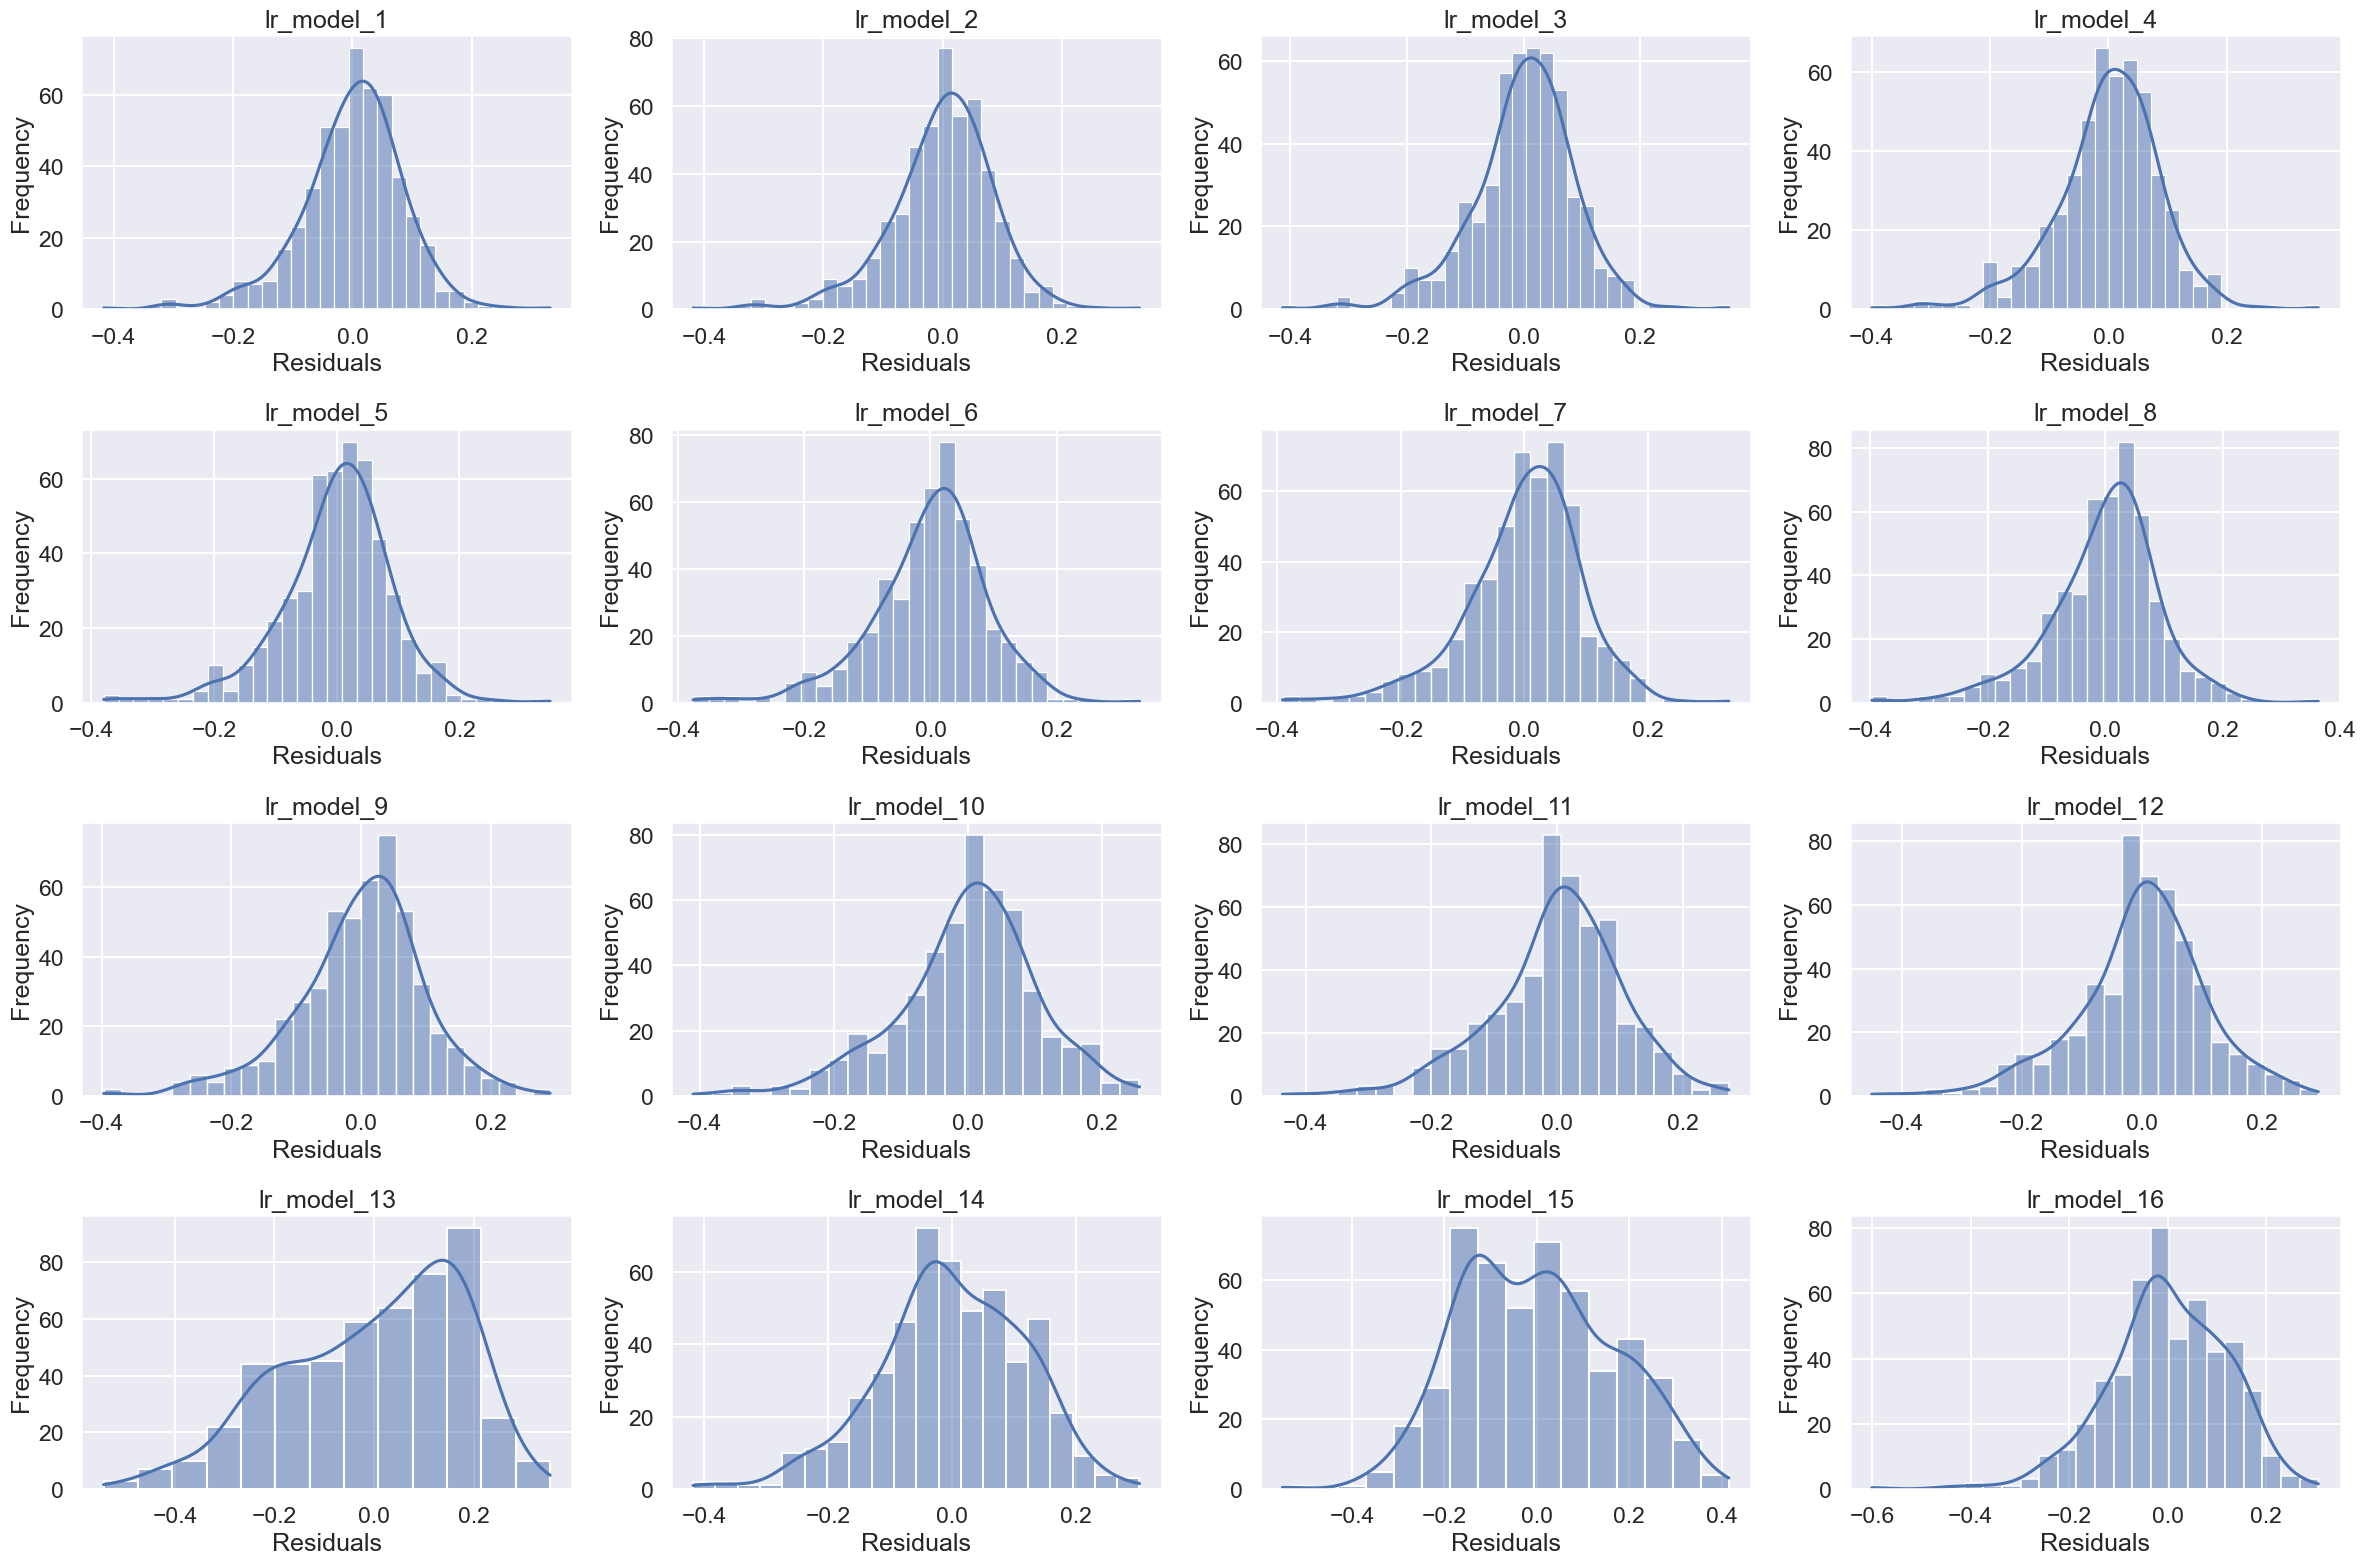

In [99]:
# Dynamic Grid Calculations
num_models = len(models)
num_columns = 4 
num_rows = (num_models + num_columns - 1) // num_columns
plt.figure(figsize=(num_columns * 6, num_rows * 4))

for i, (name, model) in enumerate(models.items(), start=1):
    # For statsmodels models
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(model.resid, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(name)

plt.tight_layout()
plt.show()

#### OBSERVATIONS

1. **Residual Distributions:** Models 1 through 10 exhibit residuals that approximate a normal distribution, suggesting these models fit the data well. In contrast, models beyond Model 10 show residuals that are either skewed or multi-peaked, which may indicate underfitting or the omission of significant data patterns. The deviation from normality suggests that these models may not fully capture the underlying data structure.

2. **Variance Analysis:** Models 1 through 8 have low residual variance, indicating stable and consistent predictions. From Model 9 onwards, there is an observable increase in residual variance, which may suggest that these models have lower explanatory power and might be capturing more noise. This increase could be attributed to the inability to generalize well to the data.

3. **Residual Characteristics:** The residuals of Models 1 through 8 display a slight left shoulder, with Model 8 showing the least pronounced shoulder. This feature might indicate potential overfitting or the influence of outliers. It suggests that the models might be overly complex and capturing noise rather than the true data trend.

## **<a id='model-assessment-and-comparison'>MODEL ASSESSMENT AND COMPARISON<a/>**  [▲](#top)

In [100]:
# Evaluate R-squared values
results = []

for name, model in models.items():
    # For statsmodels models
    results.append({
        "Model": f'{name} (base)' if name == "lr_model_1" else name,
        "R-squared": model.rsquared,
        "Adjusted R-squared": model.rsquared_adj,
        "AIC": model.aic,
        "BIC": model.bic,
        "F-statistic": model.fvalue,
        "No. of Predictors": no_of_predictors[name],
    })

results_df = pd.DataFrame(results)
round(results_df, 4)

Model  R-squared  Adjusted R-squared        AIC       BIC  \
0   lr_model_1 (base)     0.8541              0.8496 -1000.7752 -933.3095   
1          lr_model_2     0.8530              0.8488  -999.0068 -935.7577   
2          lr_model_3     0.8491              0.8450  -987.6518 -928.6193   
3          lr_model_4     0.8467              0.8429  -981.7921 -926.9762   
4          lr_model_5     0.8436              0.8401  -973.7208 -923.1216   
5          lr_model_6     0.8385              0.8352  -959.7819 -913.3992   
6          lr_model_7     0.8341              0.8311  -948.2740 -906.1079   
7          lr_model_8     0.8309              0.8282  -940.8437 -902.8942   
8          lr_model_9     0.8136              0.8109  -893.8689 -860.1361   
9         lr_model_10     0.7902              0.7877  -836.7608 -807.2445   
10        lr_model_11     0.7853              0.7831  -827.0677 -801.7681   
11        lr_model_12     0.7782              0.7764  -812.8492 -791.7661   
12        lr_model_13     0.3855              0.3818  -304.2549 -287.3885   
13        lr_model_14     0.7333              0.7317  -722.4296 -705.5632   
14        lr_model_15     0.4640              0.4618  -374.6850 -362.0352   
15        lr_model_16     0.7130              0.7119  -687.7018 -675.0520   

    F-statistic  No. of Predictors  
0      189.3440                 15  
1      201.5034                 14  
2      210.7448                 13  
3      224.5816                 12  
4      239.7297                 11  
5      254.4332                 10  
6      274.2935                  9  
7      302.2961                  8  
8      307.3852                  7  
9      310.1908                  6  
10     362.0942                  5  
11     435.1355                  4  
12     103.9329                  3  
13     455.5114                  3  
14     215.5178                  2  
15     618.6461                  2

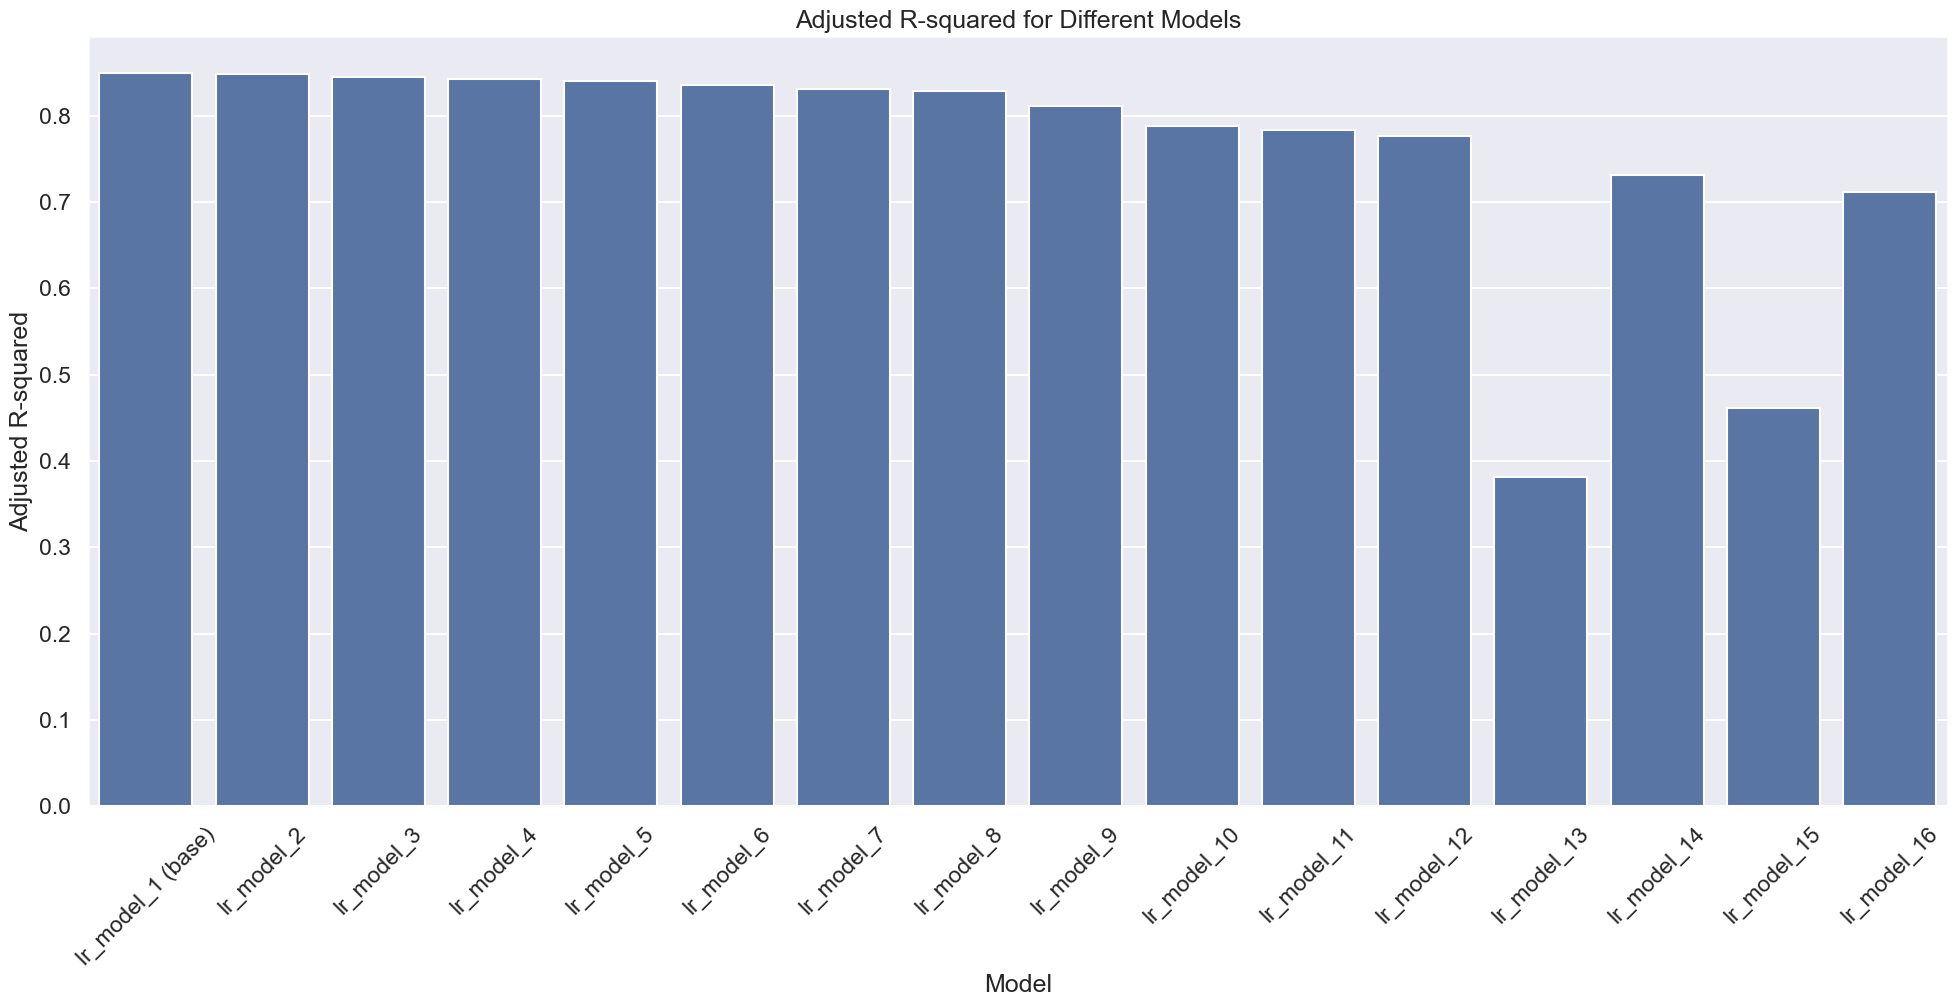

In [101]:
# Plotting Adjusted R-squared for each model
plt.figure(figsize=(24, 10))
ax = sns.barplot(x="Model", y="Adjusted R-squared", data=results_df)
plt.xticks(rotation=45)
plt.title("Adjusted R-squared for Different Models")
plt.show()

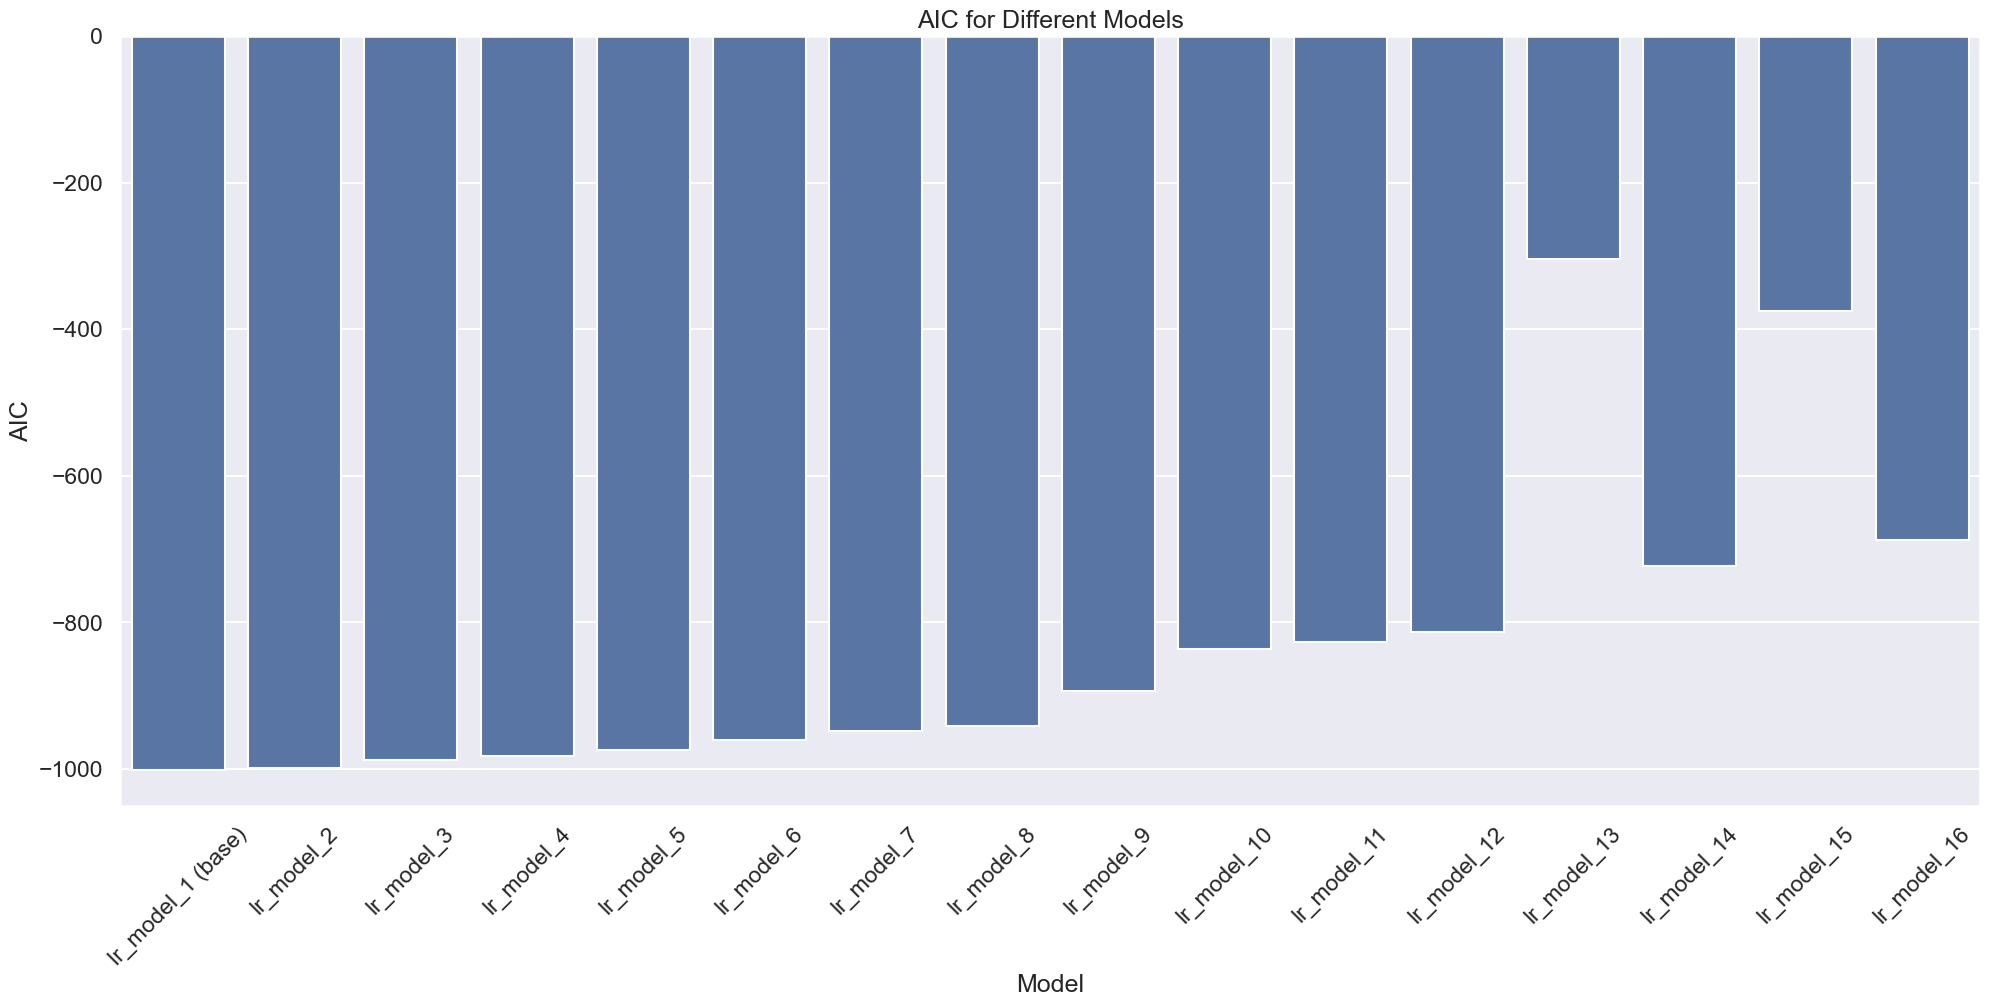

In [102]:
# Plotting AIC for each model
plt.figure(figsize=(24, 10))
ax = sns.barplot(x="Model", y="AIC", data=results_df)
plt.xticks(rotation=45)
plt.title("AIC for Different Models")

plt.show()

In [103]:
compare_df = results_df.copy()
compare_df.set_index("Model", inplace=True)
compare_df.drop(['lr_model_13', 'lr_model_15'], inplace=True)

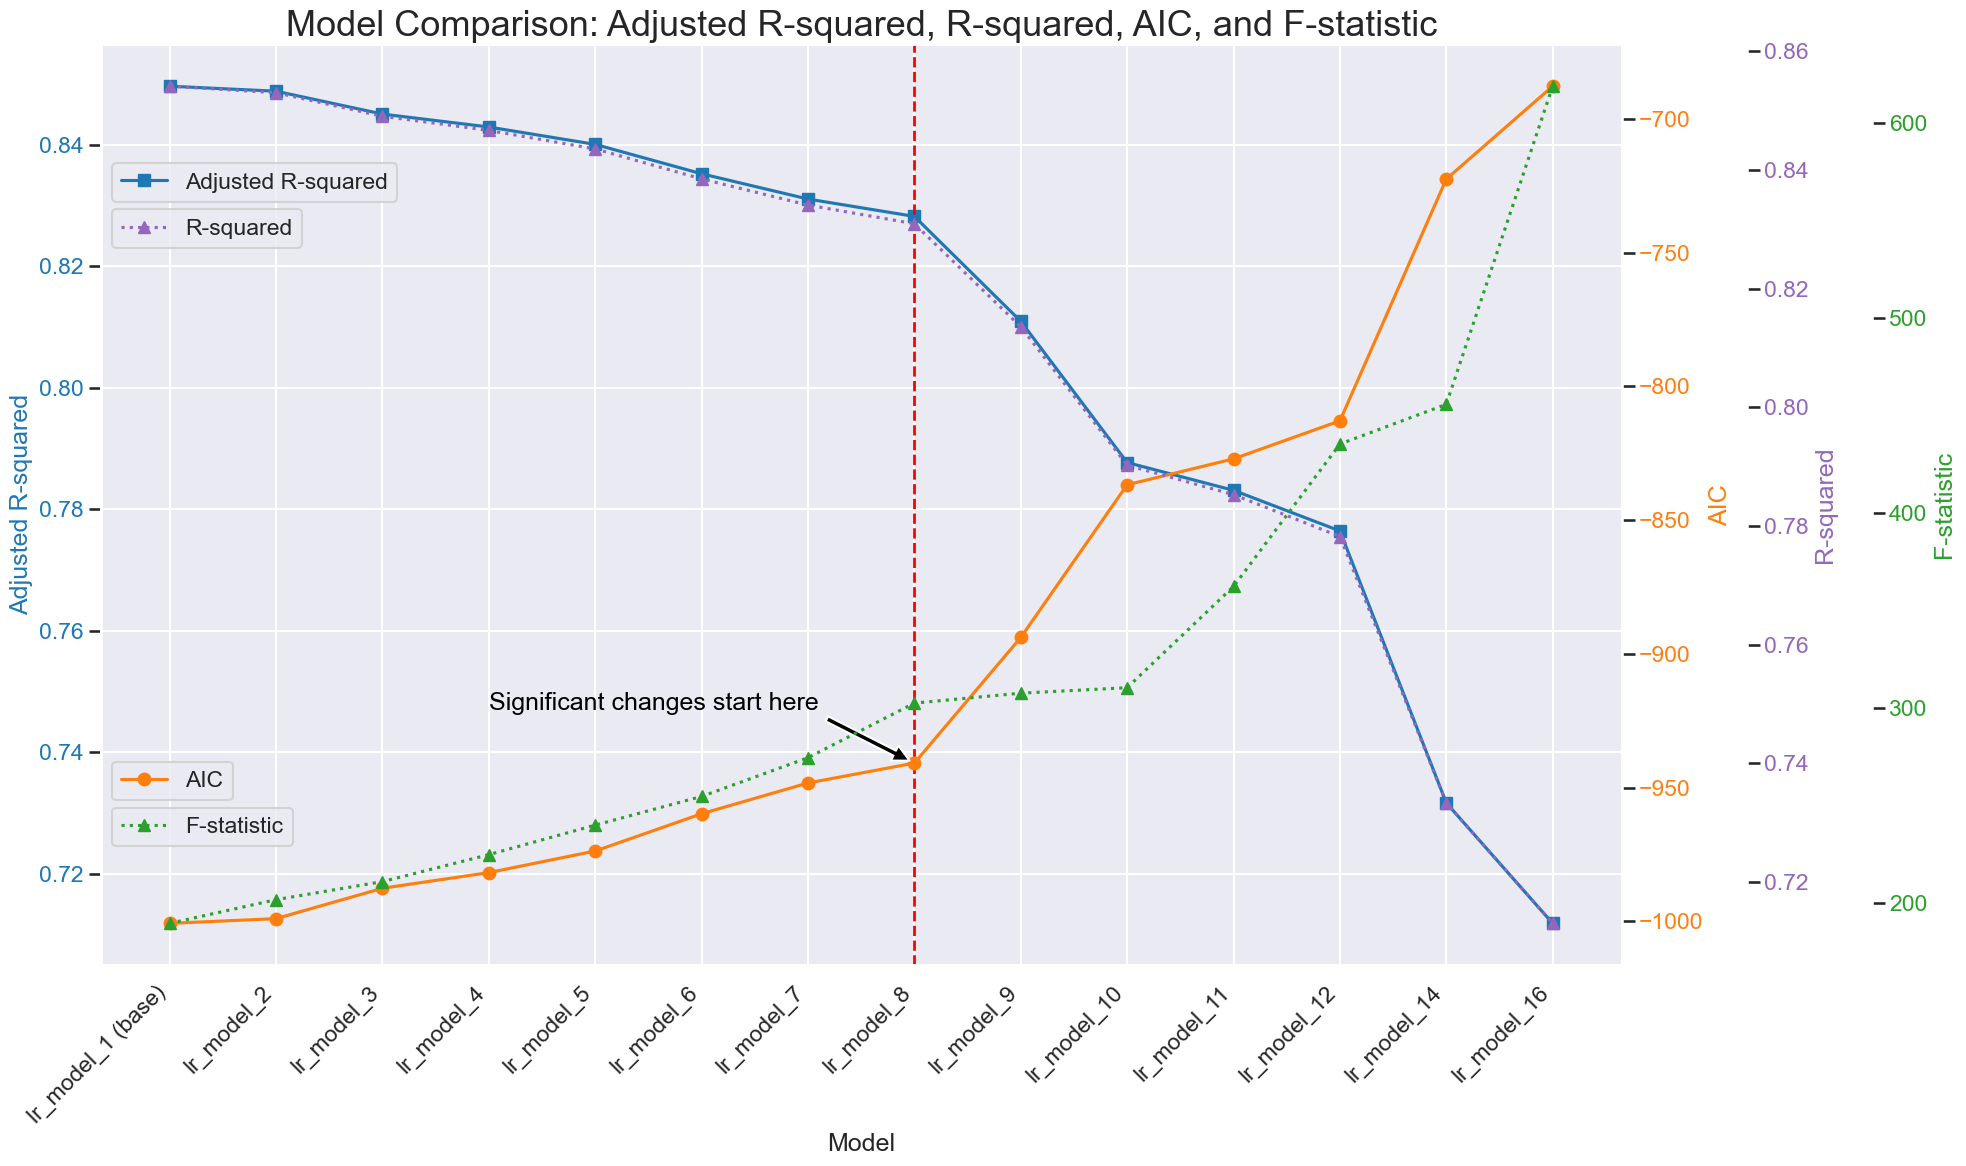

In [104]:
# Get the index for 'lr_model_8'
model_index = compare_df.index.get_loc('lr_model_8')

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(20, 12))

# Plot Adjusted R-squared
color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Adjusted R-squared', color=color)
ax1.plot(compare_df.index, compare_df['Adjusted R-squared'], marker='s', linestyle='-', color=color, label='Adjusted R-squared')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(compare_df.index, rotation=45, ha='right')

# Create a second y-axis for AIC
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('AIC', color=color)
ax2.plot(compare_df.index, compare_df['AIC'], marker='o', linestyle='-', color=color, label='AIC')
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for R-squared
ax3 = ax1.twinx()
color = 'tab:purple'
ax3.spines['right'].set_position(('outward', 90))
ax3.set_ylabel('R-squared', color=color)
ax3.plot(compare_df.index, compare_df['R-squared'], marker='^', linestyle=':', color=color, label='R-squared')
ax3.tick_params(axis='y', labelcolor=color)

# Create a fourth y-axis for F-statistic
ax4 = ax1.twinx()
color = 'tab:green'
ax4.spines['right'].set_position(('outward', 180))
ax4.set_ylabel('F-statistic', color=color)
ax4.plot(compare_df.index, compare_df['F-statistic'], marker='^', linestyle=':', color=color, label='F-statistic')
ax4.tick_params(axis='y', labelcolor=color)

# Add vertical line
ax1.axvline(x=model_index, color='red', linestyle='--', linewidth=2)

# Add text annotation
aic_value = compare_df['AIC'].iloc[model_index]
ax2.annotate('Significant changes start here', 
             xy=(model_index, results_df['AIC'].iloc[model_index]),
             xytext=(model_index - 4, results_df['AIC'].iloc[model_index] + 20),  
             arrowprops=dict(facecolor='black', shrink=0.05), color='black')

# Set up labels and title
ax1.set_title('Model Comparison: Adjusted R-squared, R-squared, AIC, and F-statistic', fontsize=26)
ax1.legend(loc='center left', bbox_to_anchor=(0, 0.85))
ax2.legend(loc='center left', bbox_to_anchor=(0, 0.2))
ax3.legend(loc='center left', bbox_to_anchor=(0, 0.8))
ax4.legend(loc='center left', bbox_to_anchor=(0, 0.15))

# ax1.grid(visible=False)
ax2.grid(visible=False)
ax3.grid(visible=False)
ax4.grid(visible=False)

fig.tight_layout()
plt.show()

#### OBSERVATIONS

1. The two most significant features are `temperature` and `year_2019`. While others are mild in their impact.
2. **Balanced Trade-off**: **`lr_model_8`** provides a well-balanced trade-off by significantly reducing complexity (fewer predictors) while maintaining competitive levels of adjusted R-squared and AIC. This balance makes it a robust choice, especially when model simplicity and interpretability are important.
3. **Efficiency vs. Complexity**: Transitioning from `lr_model_7` to `lr_model_8` involves a modest trade-off in metrics but results in a simpler model. The move from `lr_model_8` to `lr_model_9` further reduces complexity, with a notable decrease in AIC but also a larger drop in adjusted R-squared. This indicates that while `lr_model_9` has a more efficient fit, it sacrifices some explanatory power.
4. **Practical Considerations**: **`lr_model_8`** strikes a good balance between model efficiency and complexity. It reduces the number of predictors significantly while keeping adjusted R-squared and AIC at acceptable levels. This makes it a practical choice for scenarios where interpretability and avoiding overfitting are crucial, despite a slightly higher AIC compared to `lr_model_9`.

#### OBSERVATIONS



In [105]:
lr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     302.3
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          1.81e-184
Time:                        23:25:20   Log-Likelihood:                 479.42
No. Observations:                 501   AIC:                            -940.8
Df Residuals:                     492   BIC:                            -902.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3083      0.027     11.299      0.000       0.255       0.362
season_spring             -0.1121      0.016     -7.108      0.000      -0.143      -0.081
temperature                0.4612      0.029     16.132      0.000       0.405       0.517
season_winter              0.0612      0.013      4.773      0.000       0.036       0.086
humidity                  -0.1777      0.022     -7.903      0.000      -0.222      -0.134
weather_situations_bad    -0.1642      0.030     -5.533      0.000      -0.223      -0.106
wind_speed                -0.1266      0.022     -5.834      0.000      -0.169      -0.084
month_sept                 0.0775      0.015      5.050      0.000       0.047       0.108
year_2019                  0.2274      0.009     26.576      0.000       0.211       0.244
==============================================================================
Omnibus:                       53.083   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.780
Skew:                          -0.625   Prob(JB):                     2.91e-23
Kurtosis:                       4.846   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
lr_features['lr_model_8']

['season_spring',
 'temperature',
 'season_winter',
 'humidity',
 'weather_situations_bad',
 'wind_speed',
 'month_sept',
 'year_2019']

## **<a id='final-model'>FINAL MODEL<a/>**  [▲](#top)

In [107]:
# Select the required features
X_train_final = X_train[lr_features['lr_model_8']]

# Build final linear regression model using sklearn
final_model = build_lr_model(X_train_final, y_train, method='sklearn')

final_model_sm = lr_model_8

Linear Regression Model (sklearn):
Intercept: 0.30828359248747034
Coefficients: [-0.11211626  0.46120324  0.06121371 -0.17768665 -0.16422009 -0.12660933
  0.07750765  0.22739587]


In [108]:
final_features = lr_features['lr_model_8']

## **<a id='check-model-assumptions'>CHECK MODEL ASSUMPTIONS<a/>**  [▲](#top)

1. **Linearity:** The relationship between the independent variables (features) and the dependent variable (target) is linear.
2. **Homoscedasticity:** Residuals have constant variance (i.e., they are homoscedastic).
3. **Independence:** Residuals (errors) are independent of each other.
4. **Normality of Residuals:** Residuals are normally distributed.

### RESIDUALS VS. FITTED VALUES

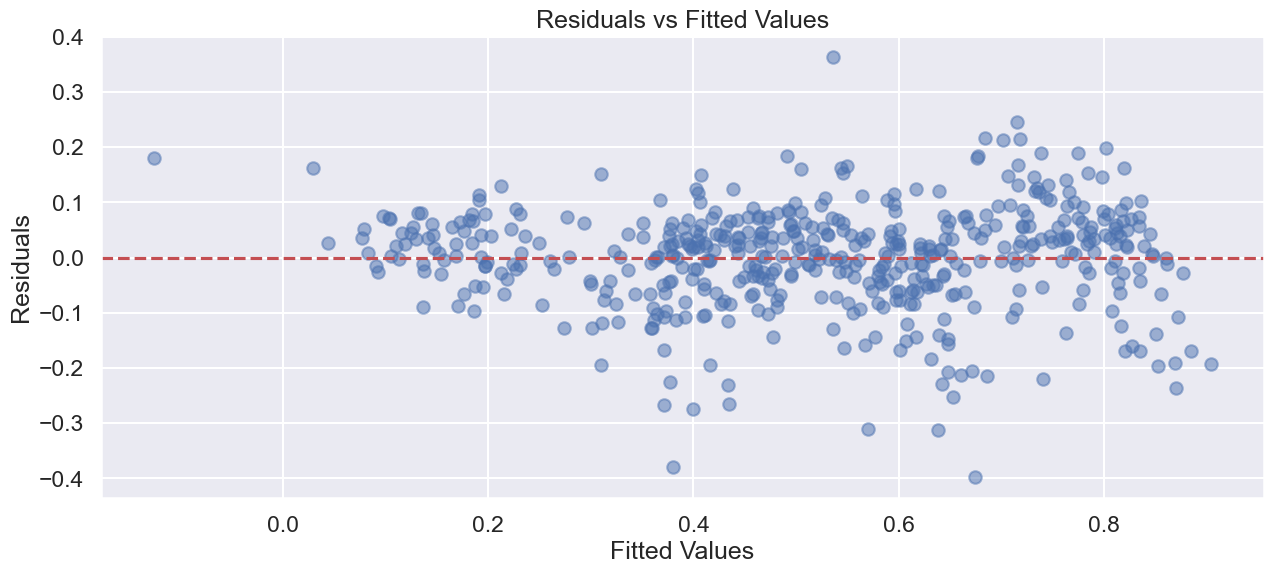

In [109]:
# Get fitted values and residuals
fitted_values = final_model_sm.fittedvalues
residuals = final_model_sm.resid

# Plot Residuals vs Fitted
plt.figure(figsize=(15, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#### OBSERVATIONS

1. Fitted Values are linear about the Target Variable.
2. Variance is constant about the mean.

### INDEPENDENCE OF FEATURES

In [110]:
# Multicollinearity Check
feature_df = calculate_pvalues_and_vif(X_train_final, final_model_sm)
feature_df

Feature        VIF  P-Value
0                   const  42.404368      0.0
1           season_spring   2.596268      0.0
2             temperature   2.586031      0.0
3           season_winter   1.735402      0.0
4                humidity   1.270070      0.0
5  weather_situations_bad   1.173169      0.0
6              wind_speed   1.145724      0.0
7              month_sept   1.075090      0.0
8               year_2019   1.042572      0.0

In [111]:
y_train_pred = final_model.predict(X_train_final)

#R-squared Value
round(metrics.r2_score(y_train,y_train_pred), 3)

0.831

#### OBSERVATIONS 

1. There is no multicollinearity between the features.
2. R-squared is 0.831 which means the model explains a significant portion of the variability in the target variable, indicating a well-fitted model.

### NORMALITY CHECK

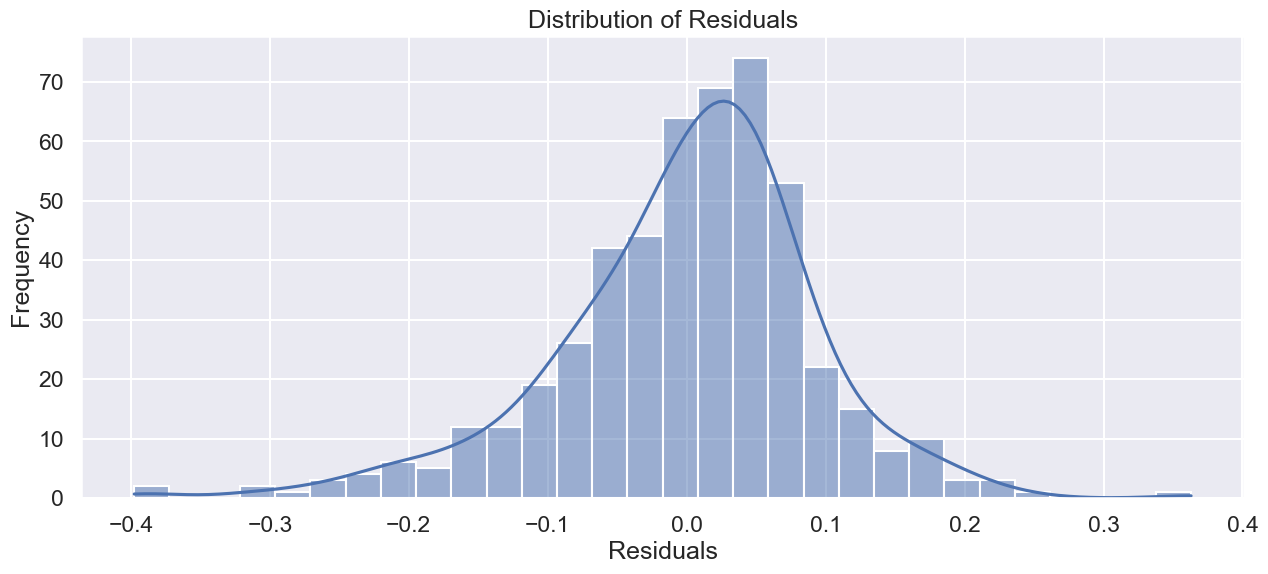

In [112]:
# Residual Analysis
plt.figure(figsize=(15, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [113]:
# Calculate the mean of residuals
mean_residuals = np.mean(residuals)
print(f"Mean of Residuals: {mean_residuals:.2f}")

Mean of Residuals: -0.00


In [114]:
# Calculate the median of residuals
median_residuals = np.median(residuals)
print(f"Median of Residuals: {median_residuals:.2f}")

Median of Residuals: 0.01


#### OBSERVATIONS

1. **Mean = 0:** A mean of 0 for residuals suggests that, on average, the model’s predictions are neither overestimating nor underestimating the target values. This is a desirable property, as it means the model is unbiased.

2. **Normal Distribution:** If the residuals are normally distributed, it implies that the model errors are randomly distributed with no systematic patterns, which is another good indicator of a well-fitting model.

## **<a id='predictions-and-evaluation-on-the-test-set'>PREDICTIONS AND EVALUATION ON THE TEST SET<a/>**  [▲](#top)

### SCALING THE TEST SET

In [115]:
# Final Model specifics:
# sklearn model name: 'final_model'
# statsmodels model name: 'final_model_sm'
# predictors: 'final_features'
# features: 'X_train_final'
# target: 'y_train'
# no. of predictors: 8
# R-squared: 0.831

In [116]:
# Check data before scaling
df_test.head()

holiday  working_day  temperature  humidity  wind_speed  count  \
583        0            1    30.169153   70.3750    7.832836   7273   
493        0            1    23.575000   74.4167   14.499604   4717   
294        0            0    17.322500   62.9167    6.208669   4308   
157        0            1    29.007500   59.7917   12.583136   4833   
670        0            1    14.555000   52.2083   17.833725   5847   

     season_spring  season_summer  season_winter  year_2019  month_aug  \
583              0              0              0          1          1   
493              0              1              0          1          0   
294              0              0              1          0          0   
157              0              1              0          0          0   
670              0              0              1          1          0   

     month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
583          0          0          0          0          0          0   
493          0          0          0          0          0          0   
294          0          0          0          0          0          0   
157          0          0          0          0          1          0   
670          0          0          0          0          0          0   

     month_may  month_nov  month_oct  month_sept  weather_situations_bad  \
583          0          0          0           0                       0   
493          1          0          0           0                       0   
294          0          0          1           0                       0   
157          0          0          0           0                       0   
670          0          1          0           0                       0   

     weather_situations_good  weekday_fri  weekday_mon  weekday_sat  \
583                        0            0            0            0   
493                        0            0            0            0   
294                        1            0            0            1   
157                        1            0            0            0   
670                        1            1            0            0   

     weekday_sun  weekday_thu  weekday_wed  
583            0            0            0  
493            0            0            1  
294            0            0            0  
157            0            0            0  
670            0            0            0

In [117]:
# Transform the test set using the same scaler used to fit_transform the train data
df_test[num_cols] = scaler.transform(df_test[num_cols])  

# Check data after scaling
df_test.head()

holiday  working_day  temperature  humidity  wind_speed     count  \
583        0            1     0.868455  0.627290    0.265707  0.834215   
493        0            1     0.662048  0.688567    0.545436  0.540152   
294        0            0     0.466335  0.514214    0.197559  0.493097   
157        0            1     0.832094  0.466836    0.465023  0.553497   
670        0            1     0.379708  0.351863    0.685331  0.670156   

     season_spring  season_summer  season_winter  year_2019  month_aug  \
583              0              0              0          1          1   
493              0              1              0          1          0   
294              0              0              1          0          0   
157              0              1              0          0          0   
670              0              0              1          1          0   

     month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
583          0          0          0          0          0          0   
493          0          0          0          0          0          0   
294          0          0          0          0          0          0   
157          0          0          0          0          1          0   
670          0          0          0          0          0          0   

     month_may  month_nov  month_oct  month_sept  weather_situations_bad  \
583          0          0          0           0                       0   
493          1          0          0           0                       0   
294          0          0          1           0                       0   
157          0          0          0           0                       0   
670          0          1          0           0                       0   

     weather_situations_good  weekday_fri  weekday_mon  weekday_sat  \
583                        0            0            0            0   
493                        0            0            0            0   
294                        1            0            0            1   
157                        1            0            0            0   
670                        1            1            0            0   

     weekday_sun  weekday_thu  weekday_wed  
583            0            0            0  
493            0            0            1  
294            0            0            0  
157            0            0            0  
670            0            0            0

In [118]:
# Separate features and target in the training set
X_test = df_test.drop('count', axis=1)
y_test = df_test['count']

X_test.shape, y_test.shape

((215, 28), (215,))

### PREDICT VALUES FOR TEST SET

In [119]:
final_features

['season_spring',
 'temperature',
 'season_winter',
 'humidity',
 'weather_situations_bad',
 'wind_speed',
 'month_sept',
 'year_2019']

In [120]:
#Predict the values for test data using the final_model build using sklearn 
y_test_pred = final_model.predict(X_test[final_features])

# Calculate residuals
residuals = y_test - y_test_pred

# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_test_pred)
explained_variance = metrics.explained_variance_score(y_test, y_test_pred)
median_ae = metrics.median_absolute_error(y_test, y_test_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors (features)
adj_r2 = 1 - ((1 - r2_sm) * (n - 1) / (n - p - 1))

# Residual Analysis metrics
residuals = y_test - y_test_pred  # Compute residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Predictive summary
predictive_summary = {
    'Mean of Residuals': mean_residuals,
    'Standard Deviation of Residuals': std_residuals,
    'Mean Absolute Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Percentage Error (MAPE)': mape,
    'R^2 Score': r2,
    'Adjusted R^2': adj_r2,
    'Explained Variance Score': explained_variance,
    'Median Absolute Error': median_ae
}

# Print predictive summary
for metric, value in predictive_summary.items():
    print(f'{metric}: {value:.4f}')

NameError: name 'r2_sm' is not defined

In [ ]:
# Add constant to test data for intercept term
X_test_with_const = sm.add_constant(X_test[final_features])

# Predict the values for test data using the final_model built using statsmodels
y_test_pred_sm = final_model_sm.predict(X_test_with_const)

# Calculate residuals
residuals = y_test - y_test_pred_sm

# Calculate performance metrics
mae_sm = metrics.mean_absolute_error(y_test, y_test_pred_sm)
mse_sm = metrics.mean_squared_error(y_test, y_test_pred_sm)
rmse_sm = np.sqrt(mse_sm)
r2_sm = metrics.r2_score(y_test, y_test_pred_sm)
explained_variance_sm = metrics.explained_variance_score(y_test, y_test_pred_sm)
median_ae_sm = metrics.median_absolute_error(y_test, y_test_pred_sm)
mape_sm = metrics.mean_absolute_percentage_error(y_test, y_test_pred_sm)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors (features)
adj_r2_sm = 1 - ((1 - r2_sm) * (n - 1) / (n - p - 1))

# Residual Analysis metrics
residuals = y_test - y_test_pred_sm  # Compute residuals
mean_residuals_sm = np.mean(residuals)
std_residuals_sm = np.std(residuals)

# Predictive summary
predictive_summary = {
    'Mean of Residuals': mean_residuals_sm,
    'Standard Deviation of Residuals': std_residuals_sm,
    'Mean Absolute Error (MAE)': mae_sm,
    'Mean Squared Error (MSE)': mse_sm,
    'Root Mean Squared Error (RMSE)': rmse_sm,
    'Mean Absolute Percentage Error (MAPE)': mape_sm,
    'R^2 Score': r2_sm,
    'Adjusted R^2': adj_r2_sm,
    'Explained Variance Score': explained_variance_sm,
    'Median Absolute Error': median_ae_sm
}

# Print predictive summary
for metric, value in predictive_summary.items():
    print(f'{metric}: {value:.4f}')

### MODEL PERFORMANCE EVALUATION

In [ ]:
fitted_values = y_test_pred

In [ ]:
# Residual Plot
plt.figure(figsize=(15, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.show()

In [ ]:
# Q-Q Plot
plt.figure(figsize=(15, 6))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

plt.show()

In [ ]:
# Histogram of Residuals
plt.figure(figsize=(15, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.show()

In [ ]:
# Actual vs Predicted Plot
plt.figure(figsize=(15, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.show()

In [ ]:
# Actual vs Predicted Values Over Index
fig = plt.figure(figsize=(15, 6))
c = [i for i in range(1, len(y_test) + 1)]
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-", label='Actual')
plt.plot(c, y_test_pred, color="red", linewidth=2.5, linestyle="-", label='Predicted')

# Titles and labels
fig.suptitle('Actual and Predicted - Test Data', fontsize=20)
plt.xlabel('Index')
plt.ylabel('Counts')
plt.legend()

plt.show()

In [ ]:
# Leverage vs. Standardized Residuals Plot
plt.figure(figsize=(15, 6))
influence = sm.OLS(y_test, sm.add_constant(X_test)).fit().get_influence()
leverage = influence.hat_matrix_diag
std_residuals = influence.resid_studentized_internal
sns.scatterplot(x=leverage, y=std_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Leverage vs. Standardized Residuals')

plt.show()

# CONCLUSION: FINAL MODEL INTERPRETATION 

In [ ]:
intercept_final = final_model.intercept_

print('Final Linear Regression Model (sklearn):')
print(f'Intercept: {round(intercept_final, 6)}')

In [ ]:
# Create a DataFrame with feature names and coefficients
coefficients_df = pd.DataFrame({
    'Feature': final_features,
    'Coefficient': final_model.coef_,
    'Absolute Coefficient': np.abs(final_model.coef_)
})
coefficients_df.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)
coefficients_df.index = range(1, len(coefficients_df) + 1)
coefficients_df.drop('Absolute Coefficient', axis=1, inplace=True)

# Print the DataFrame
print('Final Linear Regression Model (sklearn):')
coefficients_df

In [ ]:
final_model_sm.summary()

### Model Overview

We have a multiple linear regression model with the following equation:

```python
df.count = 0.308284 
            + (0.461203 * df.temperature) 
            + (0.227396 * df.year_2019)
            - (0.177687 * df.humidity)
            - (0.164220 * df.weather_situations_bad)
            - (0.126609 * df.wind_speed)
            - (0.112116 * df.season_spring) 
            + (0.077508 * df.month_sept)
            + (0.061214 * df.season_winter)
```

### Intercept

- **Intercept: 0.308284** When all predictor variables (temperature, year_2019, humidity, weather_situations_bad, wind_speed, season_spring, month_sept, season_winter) are zero, the expected value of the target variable is 0.308284. In practice, this value might not be directly interpretable, especially if some predictors cannot realistically be zero (e.g., temperature, humidity). It often serves as a baseline from which the effects of predictors are measured.

### Coefficients Interpretation

1. **Temperature (0.461203)** For each one-unit increase in temperature, the target variable increases by 0.461203 units, holding all other variables constant. This positive coefficient suggests that higher temperatures are associated with an increase in the target variable.

2. **Year 2019 (0.227396)** Being in the year 2019 (as opposed to another reference year) increases the target variable by 0.227396 units, holding other variables constant. This indicates that the target variable was higher in 2019 compared to the reference year.

3. **Humidity (-0.177687)** For each one-unit increase in humidity, the target variable decreases by 0.177687 units, holding all other variables constant. This negative coefficient implies that higher humidity is associated with a decrease in the target variable.

4. **Weather Situations Bad (-0.164220)** When weather situations are bad (relative to good weather, assuming binary coding), the target variable decreases by 0.164220 units, holding other variables constant. This suggests that bad weather situations are associated with a decrease in the target variable.

5. **Wind Speed (-0.126609)** For each one-unit increase in wind speed, the target variable decreases by 0.126609 units, holding all other variables constant. This negative coefficient suggests that higher wind speeds are associated with a decrease in the target variable.

6. **Season Spring (-0.112116)** During the spring season (relative to another reference season), the target variable decreases by 0.112116 units, holding other variables constant. This implies that spring is associated with a decrease in the target variable compared to the reference season.

7. **Month Sept (0.077508)** In September (relative to the reference month), the target variable increases by 0.077508 units, holding other variables constant. This indicates that September is associated with an increase in the target variable compared to the reference month.

8. **Season Winter (0.061214)** During the winter season (relative to another reference season), the target variable increases by 0.061214 units, holding other variables constant. This implies that winter is associated with a slight increase in the target variable compared to the reference season.

### Summary

- **Positive Coefficients:** `temperature`, `year_2019`, `month_sept`, and `season_winter` all have positive effects on the target variable, meaning that increases in these variables are associated with an increase in the target variable.
- **Negative Coefficients:** `humidity`, `weather_situations_bad`, `wind_speed`, and `season_spring` have negative effects on the target variable, meaning that increases in these variables are associated with a decrease in the target variable.

In [ ]:
# Extract Summary data for Hypothesis Testing on the coefficients
model_summary = final_model_sm.summary2().tables[1]

# Extract relevant columns for the table
table = model_summary[['Coef.', 'Std.Err.', 't', 'P>|t|', '[0.025', '0.975]']].rename(
    columns={
        'Coef.': 'Coefficient',
        'Std.Err.': 'Std. Error',
        't': 't-Value',
        'P>|t|': 'P-Value',
        '[0.025': '95% CI (Lower)',
        '0.975]': '95% CI (Upper)'
    }
)

table

### Hypothesis Testing for Coefficients

For each predictor $ X_i $ in the model, we test the following hypotheses:

- **Null Hypothesis ($ H_0 $):** $ \beta_i = 0 $ (The predictor has no effect on the target variable.)
- **Alternative Hypothesis ($ H_1 $):** $ \beta_i \neq 0 $ (The predictor does have an effect on the target variable.)

The test statistic for each coefficient is calculated using the formula:

$
t = \frac{\text{coef}}{\text{std err}}
$

where `coef` is the coefficient value and `std err` is the standard error of the coefficient. The p-value associated with the t-statistic indicates whether the coefficient is significantly different from zero.

### Interpretation

1. **Intercept:**
   - **Coefficient:** 0.3083
   - **Standard Error:** 0.027
   - **t-Statistic:** 11.299
   - **P-Value:** 0.000
   - **Interpretation:** Since the p-value is less than the significance level of 0.05, we reject the null hypothesis. This indicates that the intercept is statistically significant, meaning the baseline value of the target variable is significantly different from zero when all predictor variables are zero.

2. **Temperature:**
   - **Coefficient:** 0.4612
   - **Standard Error:** 0.029
   - **t-Statistic:** 16.132
   - **P-Value:** 0.000
   - **Interpretation:** Given that the p-value is less than 0.05, we reject the null hypothesis. This suggests that temperature has a significant positive effect on the target variable, with each unit increase in temperature corresponding to a 0.4612 unit increase in the target variable.

3. **Year 2019:**
   - **Coefficient:** 0.2274
   - **Standard Error:** 0.009
   - **t-Statistic:** 26.576
   - **P-Value:** 0.000
   - **Interpretation:** Since the p-value is below 0.05, we reject the null hypothesis. This implies that the year 2019 has a significant positive impact on the target variable.

4. **Humidity:**
   - **Coefficient:** -0.1777
   - **Standard Error:** 0.022
   - **t-Statistic:** -7.903
   - **P-Value:** 0.000
   - **Interpretation:** As the p-value is less than 0.05, we reject the null hypothesis. This indicates that humidity has a significant negative effect on the target variable, with each unit increase in humidity leading to a 0.1777 unit decrease in the target variable.

5. **Weather Situations Bad:**
   - **Coefficient:** -0.1642
   - **Standard Error:** 0.030
   - **t-Statistic:** -5.533
   - **P-Value:** 0.000
   - **Interpretation:** The p-value is less than the 0.05 threshold, so we reject the null hypothesis. This means that bad weather situations have a significant negative impact on the target variable.

6. **Wind Speed:**
   - **Coefficient:** -0.1266
   - **Standard Error:** 0.022
   - **t-Statistic:** -5.834
   - **P-Value:** 0.000
   - **Interpretation:** Given that the p-value is less than 0.05, we reject the null hypothesis. This suggests that wind speed has a significant negative effect on the target variable.

7. **Season Spring:**
   - **Coefficient:** -0.1121
   - **Standard Error:** 0.016
   - **t-Statistic:** -7.108
   - **P-Value:** 0.000
   - **Interpretation:** Since the p-value is below 0.05, we reject the null hypothesis. This indicates that the spring season has a significant negative effect on the target variable.

8. **Month Sept:**
   - **Coefficient:** 0.0775
   - **Standard Error:** 0.015
   - **t-Statistic:** 5.050
   - **P-Value:** 0.000
   - **Interpretation:** The p-value is less than the significance level of 0.05, so we reject the null hypothesis. This suggests that September has a significant positive effect on the target variable.

9. **Season Winter:**
   - **Coefficient:** 0.0612
   - **Standard Error:** 0.013
   - **t-Statistic:** 4.773
   - **P-Value:** 0.000
   - **Interpretation:** Given that the p-value is below 0.05, we reject the null hypothesis. This indicates that the winter season has a significant positive effect on the target variable.

### Summary

All predictors in the model are statistically significant, as indicated by their p-values being less than 0.05. This suggests that each predictor has a meaningful impact on the target variable. The direction and magnitude of their effects are reflected in the coefficients, which provide insights into how each predictor influences the target variable.


## PRACTICAL IMPLICATIONS

- **Higher temperatures and the year 2019 have a positive impact** on the target variable. This suggests that warmer weather and activities in 2019 may have led to increased demand or higher performance in the business. Businesses should consider leveraging warmer periods and specific year-based trends for promotional activities or resource allocation.

- **High humidity, adverse weather conditions, high wind speeds, and the spring season have a negative impact** on the target. These factors may lead to reduced customer turnout, lower operational efficiency, or decreased sales. Businesses should prepare for these conditions by implementing contingency plans or adjusting their strategies during adverse weather and the spring season to mitigate potential losses.

- **September and winter months have a slight positive effect** on the target variable. This indicates that business activities or sales might peak during these times. Companies should focus on maximizing opportunities during September and winter by planning targeted marketing campaigns, seasonal promotions, or increasing inventory to capitalize on these periods of higher demand.

- **The negative impact of bad weather conditions** on the target variable suggests that poor weather can significantly disrupt operations or customer engagement. Businesses should consider investing in weather-resistant infrastructure, flexible service models, or alternative strategies to maintain performance during adverse weather conditions.

- **The influence of wind speed on the target variable** highlights that higher wind speeds can negatively affect the target. For businesses with outdoor operations or events, it may be necessary to monitor weather forecasts and have contingency plans in place to minimize the impact of windy condition

- **The positive influence of the month of September** indicates that this month may be a peak period for business activities. Companies should optimize their operations and marketing efforts for September to leverage the increased demand and maximize revenue.

- **The positive impact of the winter season** suggests that winter months could be a high-performing period for the business. This could be due to seasonal demand, special events, or customer preferences during winter. Businesses should plan for increased activity and allocate resources accordingly to take advantage of the winter season.

- **The negative impact of the spring season** suggests that this period might see a dip in performance or demand. Businesses may need to adjust their strategies during the spring to address the lower activity levels, such as offering spring promotions or diversifying their product or service offerings to maintain customer interest.

- **No significant impact from 'holiday', 'working_day', 'weekday'** on the target variable indicates that these factors do not contribute meaningfully to variations in the target. This suggests that businesses may not need to focus specifically on these variables when planning strategies or making operational decisions. Instead, efforts should be concentrated on the factors that have been shown to significantly impact the target variable.
